# Проект - Исследование объявлений о продаже квартир

## Задачи проекта
- предобработка даных 
- исследовательский (разведочный) анализ данных - EDA (Exploratory Data Analysis)
- выявление связей и зависимостей в данных
- выводы



## EDA
Разведочный анализ данных (Exploratory Data Analysis) — предварительное исследование датасета с целью определения его основных характеристик, взаимосвязей между признаками, а также сужения набора методов, используемых для создания модели Машинного обучения

с помощью EDA-анализа данных провести:
   - изучение конкретных признаков по графикам: гистограммы, диаграммы рассеивания, динамика во времени другие;
   - изучения корреляции различных признаков, матрица корреляции, выявление парных особенностей;
   - изучение описательной статистики, определение выбросов, аномалий в данных;
   - уменьшение размерности, стандартизация, создание новых признаков на основе других;

с целью:
   - выявить взамисвязи различных признаков
   - выявить особенности, аномалии в датасете
   - сформировать выводы по данным, подготовить идеи, гипотезы о данных
   

# Описание проекта

- В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. 

- Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

- По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

# Описание данных
- airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
- balcony — число балконов
- ceiling_height — высота потолков (м)
- cityCenters_nearest — расстояние до центра города (м)
- days_exposition — сколько дней было размещено объявление (от публикации до снятия)
- first_day_exposition — дата публикации
- floor — этаж
- floors_total — всего этажей в доме
- is_apartment — апартаменты (булев тип)
- kitchen_area — площадь кухни в квадратных метрах (м²)
- last_price — цена на момент снятия с публикации
- living_area — жилая площадь в квадратных метрах (м²)
- locality_name — название населённого пункта
- open_plan — свободная планировка (булев тип)
- parks_around3000 — число парков в радиусе 3 км
- parks_nearest — расстояние до ближайшего парка (м)
- ponds_around3000 — число водоёмов в радиусе 3 км
- ponds_nearest — расстояние до ближайшего водоёма (м)
- rooms — число комнат
- studio — квартира-студия (булев тип)
- total_area — общая площадь квартиры в квадратных метрах (м²)
- total_images — число фотографий квартиры в объявлении

In [1]:
# импорт необходимых библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('max_columns', None)
pd.set_option('display.max_rows', None)

# 1 Откройте файл с данными и изучите общую информацию. 

In [2]:
# загрузка данных
try:
    data = pd.read_csv('real_estate_data.csv', sep='\t')
except:
    data = pd.read_csv('https://...', sep='\t')

In [3]:
# первые 5 строк файла
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,False,False,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,False,False,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,False,False,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [4]:
# случайные 5 строк файла
data.sample(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
10284,9,2700000.0,24.00,2017-01-23T00:00:00,0,NaN,12.0,15.5,11,NaN,False,True,NaN,1.0,деревня Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,357.0
19830,10,2650000.0,38.56,2018-07-10T00:00:00,1,NaN,27.0,17.9,15,NaN,False,False,9.8,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,62.0
9847,8,3800000.0,45.50,2016-09-05T00:00:00,2,2.5,9.0,28.5,1,NaN,False,False,7.0,0.0,Санкт-Петербург,47925.0,16049.0,0.0,NaN,0.0,NaN,433.0
9216,6,1800000.0,33.00,2018-06-21T00:00:00,1,2.5,5.0,18.0,3,NaN,False,False,5.0,1.0,Никольское,NaN,NaN,NaN,NaN,NaN,NaN,207.0
21165,0,7400000.0,84.20,2018-02-01T00:00:00,4,2.5,5.0,60.4,2,NaN,False,False,8.0,NaN,Ломоносов,48607.0,36816.0,0.0,NaN,2.0,118.0,114.0


In [5]:
# последние 5 строк файла
data.tail()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
23694,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.7,5.0,73.3,3,NaN,False,False,13.83,NaN,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,NaN,5.0,38.0,4,NaN,False,False,8.50,NaN,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,NaN,3.0,29.7,1,NaN,False,False,NaN,NaN,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23697,13,11475000.0,76.75,2017-03-28T00:00:00,2,3.0,17.0,NaN,12,NaN,False,False,23.30,2.0,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0
23698,4,1350000.0,32.30,2017-07-21T00:00:00,1,2.5,5.0,12.3,1,NaN,False,False,9.00,NaN,поселок Новый Учхоз,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
# общая информация по df
data.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [7]:
# размер df
data.shape

(23699, 22)

In [8]:
# информация по индексу df
data.index

RangeIndex(start=0, stop=23699, step=1)

In [9]:
# название столбцов 
data.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'cityCenters_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

In [10]:
# количество явных дубликатов
data.duplicated().sum()

0

In [11]:
# данные статистики
np.round(data.describe(), 2).T

,count,mean,std,min,25%,50%,75%,max
total_images,23699.0,9.86,5.68,0.0,6.00,9.00,14.0,50.0
last_price,23699.0,6541548.77,10887013.27,12190.0,3400000.00,4650000.00,6800000.0,763000000.0
total_area,23699.0,60.35,35.65,12.0,40.00,52.00,69.9,900.0
rooms,23699.0,2.07,1.08,0.0,1.00,2.00,3.0,19.0
ceiling_height,14504.0,2.77,1.26,1.0,2.52,2.65,2.8,100.0
floors_total,23613.0,10.67,6.60,1.0,5.00,9.00,16.0,60.0
living_area,21796.0,34.46,22.03,2.0,18.60,30.00,42.3,409.7
floor,23699.0,5.89,4.89,1.0,2.00,4.00,8.0,33.0
kitchen_area,21421.0,10.57,5.91,1.3,7.00,9.10,12.0,112.0
balcony,12180.0,1.15,1.07,0.0,0.00,1.00,2.0,5.0


In [12]:
# количество населенных пунктов
len(data['locality_name'].unique())

365

In [13]:
# список населенных пунктов
data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

In [14]:
# количество выставленных на продажу квартир в Санкт-Петербурге и в других населенных пунктах
print(data[data['locality_name'] == 'Санкт-Петербург'].shape[0])
print(data[data['locality_name'] != 'Санкт-Петербург'].shape[0])

15721
7978


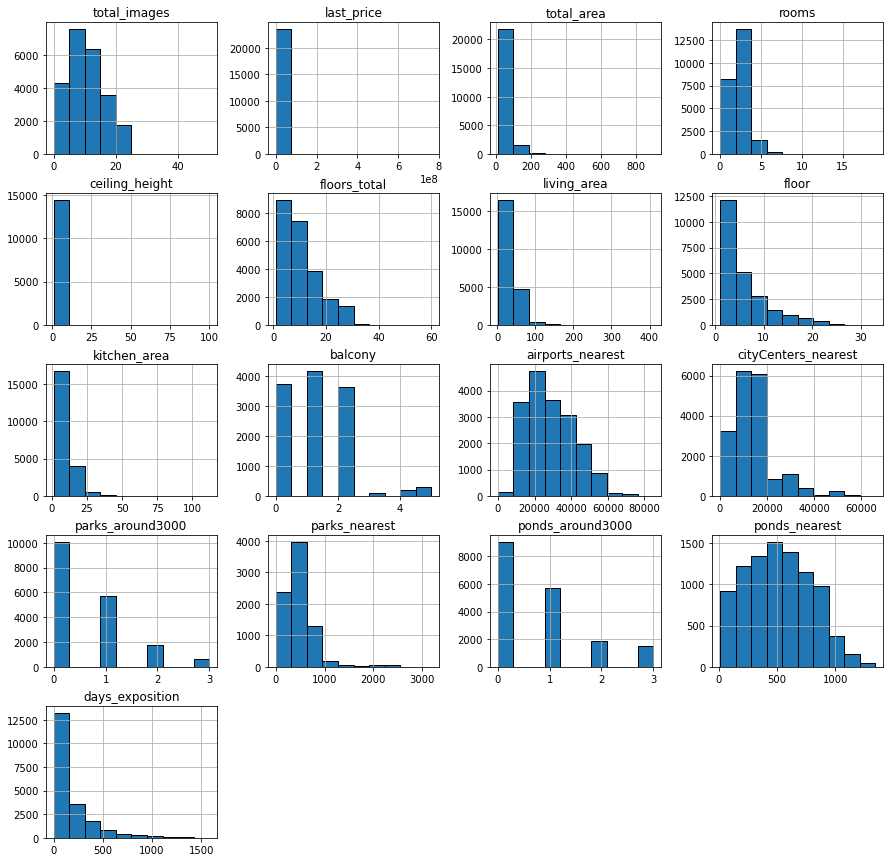

In [15]:
# гистограммы по всем признакам dataframe
data.select_dtypes(include=np.number).hist(figsize=(15,15), ec='#000000');

**Выводы по  блоку 1**

информация по датафрейму:
- размер df: 22 колонки, 23 699 строк, 8.1 Мб
- индекс числовой, начинается с 0, шаг 1
- тип данных столбцы (количество столбцов) - bool(2), float64(14), int64(3), object(3)
- пропущены значения есть в 14 столбцах
- в 3 столбцах - balcony, parks_nearest, ponds_nearest - пропущено более половины значений 
- явных дубликтов нет
- есть аномальные значения: показатели площади, высота потолков 

предварительная информация по некоторым признакам по необработанным данным:
- last price (цена) - средняя цена порядка 6.5 млн.руб., но есть сильный разброс цены: min=12 190, max=763 000 000 руб.
- total_area (общая площадь) - в среднем площадь 60 кв.м.,  90% квартир с площадью от 1 до 100 кв.метров
- rooms (количество комнат) - в среднем в продажи двукомнатыне, 90% квартир с 1-4 комнатами
- floors_total (всего этажей) - 50% квартир в домах с этажностью до 9 этажей, 75% квартир в домах с этажностью до 19 этажей
- floors (этаж) - более 50% квартир на 1-4 этаже 
- kitchen_area (площадь кухни) - в среднем 10.5 км.м, 75%  квартир с площадью кухни - 12 кв.м.
- locality_name ( населенный пункт) - выходит 365 пунктов, но возможно есть дубликаты 
- 15 721 квартир находятся в Санкт-Петербурге, 7 978 - находятся в других населенных пунктах
- days_exposition (дней размещения объявления) - в среднем 180 дней, 75% объявлений - 232 дня

# 2 Предобработка данных

**2.1. Пропуски:**
- определите, в каких столбцах есть пропуски.
- заполните пропущенные значения там, где это возможно. Например, если продавец не указал число балконов, то, скорее всего, в его квартире их нет. Такие пропуски правильно заменить на 0. Если логичную замену предложить невозможно, то оставьте эти значения пустыми. 
- укажите причины, которые могли привести к пропускам в данных.

In [16]:
# приведем название столбцов к единому стилю
data = data.rename(columns={'cityCenters_nearest': 'city_centers_nearest', 
                            'parks_around3000': 'parks_around_3000', 
                            'ponds_around3000': 'ponds_around_3000'})

In [17]:
# вывести количество пропусков по столбцам 
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
city_centers_nearest     5519
parks_around_3000        5518
parks_nearest           15620
ponds_around_3000        5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

**посмотрим детальнее некоторые признаки**

In [18]:
# значения в столбце 'is_apartment'
data['is_apartment'].value_counts(dropna=False)

NaN      20924
False     2725
True        50
Name: is_apartment, dtype: int64

In [19]:
# вывод 10 строк df со значениями nan по столбцу 'kitchen_area' 
data[data['kitchen_area'].isna()].head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
30,12,2200000.0,32.8,2018-02-19T00:00:00,1,NaN,9.0,NaN,2,NaN,False,False,NaN,NaN,Коммунар,NaN,NaN,NaN,NaN,NaN,NaN,63.0
37,10,1990000.0,45.8,2017-10-28T00:00:00,2,2.5,5.0,NaN,1,NaN,False,False,NaN,NaN,поселок городского типа Красный Бор,NaN,NaN,NaN,NaN,NaN,NaN,196.0
44,13,5350000.0,40.0,2018-11-18T00:00:00,1,NaN,22.0,NaN,3,NaN,False,False,NaN,1.0,Санкт-Петербург,30471.0,11603.0,1.0,620.0,1.0,1152.0,NaN
59,15,6300000.0,46.5,2017-03-06T00:00:00,1,NaN,13.0,NaN,13,NaN,False,False,NaN,NaN,Санкт-Петербург,11125.0,14501.0,0.0,NaN,0.0,NaN,336.0
60,3,2740000.0,35.0,2018-01-01T00:00:00,1,NaN,12.0,NaN,8,NaN,False,False,NaN,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,11.0
81,9,10949000.0,68.0,2018-12-27T00:00:00,1,NaN,10.0,NaN,6,NaN,False,False,NaN,NaN,Санкт-Петербург,NaN,NaN,NaN,NaN,NaN,NaN,NaN
82,3,4500000.0,80.5,2018-01-15T00:00:00,3,NaN,25.0,NaN,16,NaN,False,False,NaN,NaN,посёлок Шушары,12430.0,18217.0,0.0,NaN,0.0,NaN,60.0
133,12,3150000.0,31.0,2018-03-23T00:00:00,1,NaN,25.0,NaN,6,NaN,False,False,NaN,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,78.0
144,1,2450000.0,27.0,2017-03-30T00:00:00,0,NaN,24.0,15.5,2,NaN,True,False,NaN,2.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,181.0


In [20]:
# вывод 10 строк df со значениями nan по столбцу 'floors_total' 
data[data['floors_total'].isna()].head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
186,12,11640000.0,65.20,2018-10-02T00:00:00,2,NaN,NaN,30.80,4,NaN,False,False,12.00,NaN,Санкт-Петербург,39197.0,12373.0,1.0,123.0,0.0,NaN,49.0
237,4,2438033.0,28.10,2016-11-23T00:00:00,1,NaN,NaN,20.75,1,NaN,False,False,NaN,0.0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,251.0
457,4,9788348.0,70.80,2015-08-01T00:00:00,2,NaN,NaN,38.40,12,NaN,False,False,10.63,0.0,Санкт-Петербург,37364.0,8322.0,2.0,309.0,2.0,706.0,727.0
671,4,6051191.0,93.60,2017-04-06T00:00:00,3,NaN,NaN,47.10,8,NaN,False,False,16.80,0.0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,123.0
1757,5,3600000.0,39.00,2017-04-22T00:00:00,1,NaN,NaN,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,22735.0,11618.0,1.0,835.0,1.0,652.0,77.0
1930,1,9750000.0,66.77,2016-05-13T00:00:00,2,NaN,NaN,NaN,4,NaN,False,False,NaN,0.0,Санкт-Петербург,39886.0,10660.0,1.0,2276.0,3.0,244.0,90.0
2392,7,5395770.0,53.00,2017-06-29T00:00:00,2,NaN,NaN,29.00,22,NaN,False,False,9.00,0.0,Санкт-Петербург,43074.0,10820.0,0.0,NaN,0.0,NaN,48.0
2846,4,2325000.0,27.80,2016-09-21T00:00:00,1,NaN,NaN,19.40,15,NaN,False,False,NaN,0.0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,307.0
2952,10,6500000.0,54.30,2019-04-23T00:00:00,1,NaN,NaN,22.20,6,NaN,False,False,12.30,NaN,Санкт-Петербург,23606.0,3148.0,0.0,NaN,0.0,NaN,NaN
3031,9,6400000.0,56.70,2018-03-27T00:00:00,2,NaN,NaN,32.00,12,NaN,False,False,12.00,NaN,Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,231.0


In [21]:
# вывод 10 строк df со значениями nan по столбцу 'locality_name'
data[data['locality_name'].isna()].head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
1097,3,8600000.0,81.7,2016-04-15T00:00:00,3,3.55,5.0,50.80,2,NaN,False,False,8.80,0.0,NaN,23478.0,4258.0,0.0,NaN,0.0,NaN,147.0
2033,6,5398000.0,80.0,2017-05-30T00:00:00,3,NaN,4.0,42.60,2,NaN,False,False,18.60,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34.0
2603,20,3351765.0,42.7,2015-09-20T00:00:00,1,NaN,24.0,15.60,3,NaN,False,False,10.70,0.0,NaN,22041.0,17369.0,0.0,NaN,1.0,374.0,276.0
2632,2,5130593.0,62.4,2015-10-11T00:00:00,2,NaN,24.0,33.10,21,NaN,False,False,8.20,0.0,NaN,22041.0,17369.0,0.0,NaN,1.0,374.0,256.0
3574,10,4200000.0,46.5,2016-05-28T00:00:00,2,NaN,5.0,30.80,5,NaN,False,False,6.50,0.0,NaN,27419.0,8127.0,0.0,NaN,1.0,603.0,45.0
4151,17,17600000.0,89.5,2014-12-09T00:00:00,2,3.00,8.0,39.62,7,NaN,False,False,13.38,0.0,NaN,25054.0,3902.0,1.0,485.0,3.0,722.0,869.0
4189,7,9200000.0,80.0,2015-12-10T00:00:00,3,4.00,4.0,52.30,3,False,False,False,10.40,0.0,NaN,21774.0,3039.0,1.0,690.0,1.0,953.0,223.0
4670,1,5500000.0,83.0,2015-08-14T00:00:00,3,NaN,7.0,NaN,6,NaN,False,False,NaN,0.0,NaN,26534.0,5382.0,1.0,446.0,1.0,376.0,350.0
5343,19,13540000.0,85.5,2016-01-20T00:00:00,3,NaN,7.0,59.10,5,False,False,False,8.30,4.0,NaN,10556.0,9538.0,1.0,67.0,0.0,NaN,303.0
5707,7,3700000.0,30.0,2016-04-29T00:00:00,1,NaN,24.0,20.00,23,NaN,False,False,NaN,0.0,NaN,21460.0,16788.0,0.0,NaN,1.0,170.0,49.0


In [22]:
# вывод н/п со значениями nan в столбцах: airports_nearest, city_centers_nearest
(data[(data['airports_nearest'].isna()) & (data['city_centers_nearest'].isna())].
    groupby('locality_name')['last_price'].count()).sort_values(ascending=False).head(10)

locality_name
посёлок Мурино             522
Всеволожск                 398
Гатчина                    307
деревня Кудрово            299
Выборг                     237
Кудрово                    173
деревня Новое Девяткино    144
Сертолово                  142
Кириши                     125
Сланцы                     112
Name: last_price, dtype: int64

In [23]:
# вывод н/п со значениями nan в столбцах: parks_nearest_3000, ponds_nearest_3000
(data[(data['parks_around_3000'].isna()) & (data['ponds_around_3000'].isna())].
    groupby('locality_name')['last_price'].count()).sort_values(ascending=False).head(10)

locality_name
посёлок Мурино             522
Всеволожск                 398
Гатчина                    307
деревня Кудрово            299
Выборг                     237
Кудрово                    173
деревня Новое Девяткино    144
Сертолово                  142
Кириши                     125
Сланцы                     112
Name: last_price, dtype: int64

In [24]:
# вывод н/п со значениями nan в столбцах: parks_nearest, ponds_nearest
(data[(data['parks_nearest'].isna()) & (data['ponds_nearest'].isna())].
        groupby('locality_name')['last_price'].count()).sort_values(ascending=False).head(10)

locality_name
Санкт-Петербург            4714
посёлок Мурино              522
Всеволожск                  398
Гатчина                     307
деревня Кудрово             299
посёлок Шушары              288
посёлок Парголово           271
Выборг                      237
Кудрово                     173
деревня Новое Девяткино     144
Name: last_price, dtype: int64

**Выводы по пропускам**

возможные причины:
1. Данные пропущены продавцами при подаче объявления:
    - как не существенные для продажи 
    - нет данных  
    - ошибка при загрузке данных;   
    
    
2. Картографические данные (расстояния до центра, аэропорта, парков, водоемов и другие)
    - возможно не определяется, т.к. в df не указан точный адрес объекта (квартиры);



как обработать/ изменить:
- balcony/ балконы - пропущеные значения заменить на 0, логично предположить, что их нет там где NaN;
- is_apartment / апартаменты - пропущеные значения можно заменить на False, т.к. скорее всего там где реально есть апартаменты стоит True;
- days_exposition / дней размещения обьявления - скорее всего, где значение NaN объявление еще продолжает действовать. Т.к. значений NaN по сравнению с общим числом записей не велико (3181 и 23699), то в данном случае NaN можно заменить на медианное значение в столбце;
- floors_total - 86 значений не указаны, хотя при это указан этаж квартиры, это пропуски при заполнении обьявлений. Заполнить сложно так как сложно побрать логику, оставим пока так, при необходимости вернемся к этому вопросу;
- столбцы - ceiling_height, living_area, kitchen_area - пропущенные значения в этих столбцах обработаем вместе с аномальными в блоке 2.4;
- locality_name - 49 объектов с неивестным н/п, восстановить сходу трудно, возможно можно использовать данные airports_nearest, city_сenters_nearest для определения н/п, пока удалять не будем, обозначим как "неизвестно";
- airports_nearest, city_centers_nearest, parks_around_3000, ponds_around_3000: 
    - пропуски сделаны не в Санкт-Петербурге, а в других н/п;
    - видимо в этих н/п эта информация не так важна для определения цены и продажи;
    - parks_nearest, ponds_nearest пропуски есть в Санкт-Петербурге;
    - на данном этапе оставим как есть, в дальнейшем при исследовании вернемся к этому вопросу;

In [25]:
# замена nan 'balcony' на 0
data['balcony'] = data['balcony'].fillna(0)

In [26]:
# замена nan 'is_apartment' на False
data['is_apartment'] = data['is_apartment'].fillna(False)

In [27]:
# заменим nan в столбце 'locality_name' на неизвестно
data['locality_name'] = data['locality_name'].fillna(value='неизвестно')

In [28]:
# медианный период размщения объявлений 
data['days_exposition'].median()

95.0

In [29]:
# замена nan 'days_exposition' на медианное значение
data['days_exposition'] = data['days_exposition'].fillna(data['days_exposition'].median()) 

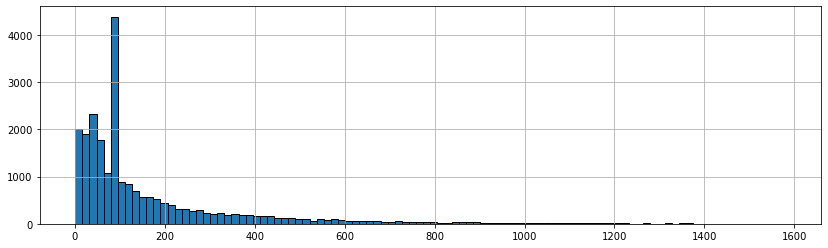

In [30]:
# распределение значений 'days_exposition'
data['days_exposition'].hist(bins=100, ec='#000000', figsize=(14,4));

Логика по замене 'days_exposition' - медианным значением в категории:
1. В реальной жизни мы делаем анализ на определенную дату, т.е. в датасете будет последняя текущая дата;
2. Если заменить nan на время последней даты в датасете, то это исказит ситуацию т.к. эти объекты еще не проданны и точно не известно сколько дней уйдет на продажу;
3. Если датасет продолжить дальше по времени, то те объявления, которые сейчас имееют значения NaN в 'days_exposition' получат конкретные данные;
4. Значений NaN по сравнению с общим числом записей (3181 и 23699) порядка 13.5%; 
5. Даже если эти 13.5% будут намного меньше или намного больше по кличеству дней, то в целом все равно медианное значение не так сильно измениться;
6. Но скорее всего пропушенные значения 'days_exposition' будут равномерно распределены около медианного значения всего df;

In [31]:
# проверка после обработки
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area             2278
balcony                     0
locality_name               0
airports_nearest         5542
city_centers_nearest     5519
parks_around_3000        5518
parks_nearest           15620
ponds_around_3000        5518
ponds_nearest           14589
days_exposition             0
dtype: int64

**2.2.	Рассмотрите типы данных в каждом столбце:**
- найдите столбцы, в которых нужно изменить тип данных.
- преобразуйте тип данных в выбранных столбцах.
- поясните, почему нужно изменить тип данных.


In [32]:
data.dtypes

total_images              int64
last_price              float64
total_area              float64
first_day_exposition     object
rooms                     int64
ceiling_height          float64
floors_total            float64
living_area             float64
floor                     int64
is_apartment               bool
studio                     bool
open_plan                  bool
kitchen_area            float64
balcony                 float64
locality_name            object
airports_nearest        float64
city_centers_nearest    float64
parks_around_3000       float64
parks_nearest           float64
ponds_around_3000       float64
ponds_nearest           float64
days_exposition         float64
dtype: object

возможно изменить типы данных в столбцах:
- first_day_exposition на datetime -  для работы с датой
- floors_total, balcony, days_exposition  на integer - для обработки и оптимизации хранения   

In [33]:
# изменение типов данных в выбранных столбцах
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%d %H:%M')
data['balcony'] = data['balcony'].astype('int')
data['days_exposition'] = data['days_exposition'].astype('int',errors='ignore')

# floors_total  не будем менять т.к. там остаются значения nan

In [34]:
# проверка
data.dtypes

total_images                     int64
last_price                     float64
total_area                     float64
first_day_exposition    datetime64[ns]
rooms                            int64
ceiling_height                 float64
floors_total                   float64
living_area                    float64
floor                            int64
is_apartment                      bool
studio                            bool
open_plan                         bool
kitchen_area                   float64
balcony                          int32
locality_name                   object
airports_nearest               float64
city_centers_nearest           float64
parks_around_3000              float64
parks_nearest                  float64
ponds_around_3000              float64
ponds_nearest                  float64
days_exposition                  int32
dtype: object

**2.3.
Изучите уникальные значения в столбце с названиями и устраните неявные дубликаты. Например, «поселок Рябово» и «поселок городского типа Рябово», «поселок Тельмана» и «посёлок Тельмана» — это обозначения одних и тех же населённых пунктов. Вы можете заменить названия в существующем столбце или создать новый с названиями без дубликатов.**

In [35]:
data['locality_name'].sort_values().unique()

array(['Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород', 'Каменногорск',
       'Кингисепп', 'Кириши', 'Кировск', 'Колпино', 'Коммунар',
       'Красное Село', 'Кронштадт', 'Кудрово', 'Лодейное Поле',
       'Ломоносов', 'Луга', 'Любань', 'Мурино', 'Никольское',
       'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф', 'Пикалёво',
       'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин', 'Санкт-Петербург',
       'Светогорск', 'Сертолово', 'Сестрорецк', 'Сланцы', 'Сосновый Бор',
       'Сясьстрой', 'Тихвин', 'Тосно', 'Шлиссельбург',
       'городской поселок Большая Ижора', 'городской поселок Янино-1',
       'городской посёлок Будогощь', 'городской посёлок Виллози',
       'городской посёлок Лесогорский', 'городской посёлок Мга',
       'городской посёлок Назия', 'городской посёлок Новоселье',
       'городской посёлок Павлово', 'городской посёлок Рощино',
       'городской посёлок Свирьстрой', 'городской посёлок Совет

**Пояснение по данным в столбце 'locality_name':**

В Общероссийском классификаторе объектов административно-территориального деления (ОКАТО) объектами классификации являются не только административно-территориальные единицы, но и населённые пункты, в частности: города, посёлки городского типа и сельские населённые пункты. Обозначение «посёлок городского типа» распространяется на рабочие, курортные и дачные посёлки. К сельским населенным пунктам относятся поселки сельского типа, хутора, кишлаки, аулы и т.п. В ОКАТО приняты следующие сокращения, которыми в основном выделяются типы населённых пунктов:
г. — город;
пгт — посёлок городского типа;
рп — рабочий посёлок;
кп — курортный посёлок;
к. — кишлак;
дп — дачный посёлок (дачный поселковый совет);
п. — посёлок сельского типа;
нп — населённый пункт;
п.ст. — посёлок при станции (посёлок станции);
ж/д ст. — железнодорожная станция;
ж/д будка — железнодорожная будка;
ж/д казарма — железнодорожная казарма;
ж/д платформа — железнодорожная платформа;
ж/д рзд — железнодорожный разъезд;
ж/д остановочный пункт — железнодорожный остановочный пункт;
ж/д путевой пост — железнодорожный путевой пост;
ж/д блокпост — железнодорожный блокпост;
с. — село;
м. — местечко;
д. — деревня;
сл. — слобода;
ст. — станция;
ст-ца — станица;
х. — хутор;
у. — улус;
рзд — разъезд;
клх — колхоз (коллективное хозяйство);
свх — совхоз (советское хозяйство);

В Общероссийском классификаторе территорий муниципальных образований (ОКТМО), введённым параллельно с ОКАТО, населённые пункты кодируются в пределах группировок третьей (нижней) ступени классификации[
В ОКТМО для наименований типов населённых пунктов приняты следующие сокращения[:
г — город;
пгт — поселок городского типа;
рп — рабочий поселок;
кп — курортный поселок;
дп — дачный поселок;
гп — городской поселок;
п — поселок;
к — кишлак;
нп — населенный пункт;
п.ст — поселок при станции (поселок станции);
п ж/д ст — поселок при железнодорожной станции;
ж/д блокпост — железнодорожный блокпост;
ж/д будка — железнодорожная будка;
ж/д ветка — железнодорожная ветка;
ж/д казарма — железнодорожная казарма;
ж/д комбинат — железнодорожный комбинат;
ж/д платформа — железнодорожная платформа;
ж/д площадка — железнодорожная площадка;
ж/д путевой пост — железнодорожный путевой пост;
ж/д остановочный пункт — железнодорожный остановочный пункт;
ж/д рзд — железнодорожный разъезд;
ж/д ст — железнодорожная станция;
м — местечко;
д — деревня;
с — село;
сл — слобода;
ст — станция;
ст-ца — станица;
у — улус
х — хутор;
рзд — разъезд;
зим — зимовье

[Населённые_пункты_в_России]
https://ru.wikipedia.org/wiki/Населённые_пункты_в_России

По указанной выше информации названия типов поселений м.б. "поселок", "городской поселок", "поселок городского типа", "дачный поселок", "село", "деревня", "поселок при станции" и т.д., название котеджный поселок м.б. входить в само название н/п  - поэтому в основном типы названия оставим как указаны в df.  

Изменения:
- 'посёлок при железнодорожной станции' на 'посёлок станции'
- 'городской поселок' на 'посёлок городского типа'
- написание 'поселок' и 'посёлок' привел к единому написанию 'посёлок', т.к.'посёлок пишется через ё по стандартам 
https://dic.academic.ru/dic.nsf/dic_forms/53794/посёлок

- "поселок Рябово" на "поселок городского типа Рябово" т.к. это явно указано в задании;


In [36]:
# количество уникальных названий 'locality_name' до устранения дупликатов
len(data['locality_name'].sort_values().unique())

365

In [37]:
# изменение данных
# 'поселок', 'посёлок' привели к единому написанию 'посёлок' - написание  через ё по стандартам
data['locality_name'] = data['locality_name'].str.replace('поселок', 'посёлок')     
data['locality_name'] = data['locality_name'].str.replace('городской посёлок', 'посёлок городского типа')
data['locality_name'] = data['locality_name'].str.replace('посeлок городского типа', 'посёлок городского типа') 
data['locality_name'] = data['locality_name'].str.replace('посёлок при железнодорожной станции', 'посёлок станции')
data['locality_name'] = data['locality_name'].str.replace('поселок Рябово', 'поселок городского типа Рябово')

In [38]:
# количество уникальных названий 'locality_name' после устранения дубликатов
len(data['locality_name'].sort_values().unique())

322

In [39]:
# проверка значений
data['locality_name'].sort_values().unique()

array(['Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород', 'Каменногорск',
       'Кингисепп', 'Кириши', 'Кировск', 'Колпино', 'Коммунар',
       'Красное Село', 'Кронштадт', 'Кудрово', 'Лодейное Поле',
       'Ломоносов', 'Луга', 'Любань', 'Мурино', 'Никольское',
       'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф', 'Пикалёво',
       'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин', 'Санкт-Петербург',
       'Светогорск', 'Сертолово', 'Сестрорецк', 'Сланцы', 'Сосновый Бор',
       'Сясьстрой', 'Тихвин', 'Тосно', 'Шлиссельбург',
       'деревня Агалатово', 'деревня Аро', 'деревня Батово',
       'деревня Бегуницы', 'деревня Белогорка', 'деревня Большая Вруда',
       'деревня Большая Пустомержа', 'деревня Большие Колпаны',
       'деревня Большое Рейзино', 'деревня Большой Сабск', 'деревня Бор',
       'деревня Борисова Грива', 'деревня Ваганово', 'деревня Вартемяги',
       'деревня Вахнова Кара', 'деревня Выскатка

**2.4.
Найдите и устраните редкие и выбивающиеся значения. Например, в столбце ceiling_height может быть указана высота потолков 25 м и 32 м. Логично предположить, что на самом деле это вещественные значения: 2.5 м и 3.2 м. Попробуйте обработать аномалии в этом и других столбцах.**
- если природа аномалии понятна и данные действительно искажены, то восстановите корректное значение.
- в противном случае удалите редкие и выбивающиеся значения.
- опишите, какие особенности в данных вы обнаружили.

In [40]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,23699.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,23699.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,0.591080,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,169.360226
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,0.959298,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,206.535633
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,0.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,1.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,199.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


По данным data.describe() есть аномалии в столбцах:
- 'ceiling_height', min высота - 1 метр, max высота - 100 метров;
- 'rooms', min = 0 комнат, max = 19 комнат
- 'total_area' - небольшие значения, 12 метров
- 'living_area', min = 2 метра
- 'kitchen_area', min = 1.3 метра
- 'last_price' - большой разброс значений

**информация:**
    
по  балконам 
- минимальные значения прописаны в СП 54.13330.2016 «СНиП 31-01-2003 Здания жилые многоквартирные». В своде правил установлено, что в многоквартирных домах в центральной части России потолок должен быть не ниже 2,5 м, а в Сибири, на Дальнем Востоке и на севере Центральной России — не ниже 2,7 м. 

по площади: обшая, жилая, кухни
- актуализированная редакция СНиП 31-01-2003 (с Изменениями N 1, 2, 3)

5.7 Площадь квартир социального использования государственного и муниципального 
жилищных фондов согласно ЖК РФ должна быть не менее:
 - Общей жилой комнаты в однокомнатной квартире — 14 м².
 - Общей жилой комнаты в квартирах с числом комнат две и более — 16 м². 
 - Кухонной зоны в кухне-столовой — 6 м².
 - В однокомнатных квартирах допускается проектировать кухни или кухни-ниши площадью не менее 5 м².
 
https://gsps.ru/poleznoe/minimalnaya-ploshchad-pomeshcheniy-kvartiry.php?utm_referrer=https%3A%2F%2Fyandex.ru%2F

**'ceiling_height'**

In [41]:
# уникальные значения столбца 'ceiling_height
data['ceiling_height'].sort_values().unique()

array([  1.  ,   1.2 ,   1.75,   2.  ,   2.2 ,   2.25,   2.3 ,   2.34,
         2.4 ,   2.45,   2.46,   2.47,   2.48,   2.49,   2.5 ,   2.51,
         2.52,   2.53,   2.54,   2.55,   2.56,   2.57,   2.58,   2.59,
         2.6 ,   2.61,   2.62,   2.63,   2.64,   2.65,   2.66,   2.67,
         2.68,   2.69,   2.7 ,   2.71,   2.72,   2.73,   2.74,   2.75,
         2.76,   2.77,   2.78,   2.79,   2.8 ,   2.81,   2.82,   2.83,
         2.84,   2.85,   2.86,   2.87,   2.88,   2.89,   2.9 ,   2.91,
         2.92,   2.93,   2.94,   2.95,   2.96,   2.97,   2.98,   2.99,
         3.  ,   3.01,   3.02,   3.03,   3.04,   3.05,   3.06,   3.07,
         3.08,   3.09,   3.1 ,   3.11,   3.12,   3.13,   3.14,   3.15,
         3.16,   3.17,   3.18,   3.2 ,   3.21,   3.22,   3.23,   3.24,
         3.25,   3.26,   3.27,   3.28,   3.29,   3.3 ,   3.31,   3.32,
         3.33,   3.34,   3.35,   3.36,   3.37,   3.38,   3.39,   3.4 ,
         3.42,   3.43,   3.44,   3.45,   3.46,   3.47,   3.48,   3.49,
      

In [42]:
# заменим значения в столбце ceiling_height меньше 2.5 метра и больше 20 метров - установим 2.5 метра 
data.loc[data['ceiling_height'] >= 20, 'ceiling_height'] = 2.5
data.loc[data['ceiling_height'] < 2.5, 'ceiling_height'] = 2.5

In [43]:
# уникальные значения столбца 'ceiling_height' после преобразования
data['ceiling_height'].sort_values().unique()

array([ 2.5 ,  2.51,  2.52,  2.53,  2.54,  2.55,  2.56,  2.57,  2.58,
        2.59,  2.6 ,  2.61,  2.62,  2.63,  2.64,  2.65,  2.66,  2.67,
        2.68,  2.69,  2.7 ,  2.71,  2.72,  2.73,  2.74,  2.75,  2.76,
        2.77,  2.78,  2.79,  2.8 ,  2.81,  2.82,  2.83,  2.84,  2.85,
        2.86,  2.87,  2.88,  2.89,  2.9 ,  2.91,  2.92,  2.93,  2.94,
        2.95,  2.96,  2.97,  2.98,  2.99,  3.  ,  3.01,  3.02,  3.03,
        3.04,  3.05,  3.06,  3.07,  3.08,  3.09,  3.1 ,  3.11,  3.12,
        3.13,  3.14,  3.15,  3.16,  3.17,  3.18,  3.2 ,  3.21,  3.22,
        3.23,  3.24,  3.25,  3.26,  3.27,  3.28,  3.29,  3.3 ,  3.31,
        3.32,  3.33,  3.34,  3.35,  3.36,  3.37,  3.38,  3.39,  3.4 ,
        3.42,  3.43,  3.44,  3.45,  3.46,  3.47,  3.48,  3.49,  3.5 ,
        3.51,  3.52,  3.53,  3.54,  3.55,  3.56,  3.57,  3.58,  3.59,
        3.6 ,  3.62,  3.63,  3.65,  3.66,  3.67,  3.68,  3.69,  3.7 ,
        3.75,  3.76,  3.78,  3.8 ,  3.82,  3.83,  3.84,  3.85,  3.86,
        3.87,  3.88,

в 'ceiling_height' остаются значения nan

сделаем замену пропущенных значений потолков на основе категорий этажности домов, медианным значениям высоты потолков в этих категориях

In [44]:
# сначала посмотрим на значения высоты потолков по категориям этажности домов
data.groupby('floors_total')['ceiling_height'].median()

floors_total
1.0     2.80
2.0     2.70
3.0     2.80
4.0     3.00
5.0     2.55
6.0     3.00
7.0     3.00
8.0     2.80
9.0     2.55
10.0    2.60
11.0    2.75
12.0    2.65
13.0    2.70
14.0    2.60
15.0    2.70
16.0    2.70
17.0    2.70
18.0    2.70
19.0    2.75
20.0    2.75
21.0    2.70
22.0    2.75
23.0    2.75
24.0    2.75
25.0    2.75
26.0    2.66
27.0    2.70
28.0    2.60
29.0    2.60
33.0     NaN
34.0    2.65
35.0    2.70
36.0    2.60
37.0    2.50
52.0    2.65
60.0    2.88
Name: ceiling_height, dtype: float64

In [45]:
# вручную заменим значение для уровня этажности в 33 этажа, на ближайшие по этажности (34 этажа)  
data.loc[data['floors_total'] == 33.0, 'ceiling_height'] = 2.65

In [46]:
# заменим пропущенные значения высоты потолков на медианные значения по группам этажности домов 
data['ceiling_height'] = data['ceiling_height'].fillna(data.groupby('floors_total')['ceiling_height'].transform('median'))

In [47]:
# проверка значений в столбце 'ceiling_height'
data['ceiling_height'].unique()

array([ 2.7 ,  2.75,  2.55,  2.6 ,  3.03,  2.65,  2.66,  2.5 ,  2.67,
        2.56,  3.  ,  3.05,  2.8 ,  2.9 ,  3.2 ,  2.61,  3.25,  3.45,
        2.77,  2.85,  2.64,  2.57,  4.15,  3.5 ,  3.3 ,  2.71,  4.  ,
         nan,  2.73,  2.84,  3.1 ,  3.4 ,  3.06,  2.72,  2.54,  2.51,
        2.78,  2.76,  2.58,  3.7 ,  2.52,  5.2 ,  2.87,  2.59,  3.6 ,
        2.92,  3.11,  3.13,  3.8 ,  3.15,  3.55,  3.16,  3.62,  3.12,
        2.53,  2.74,  2.96,  5.3 ,  5.  ,  2.79,  2.95,  4.06,  2.94,
        3.82,  3.54,  3.53,  2.83,  4.7 ,  3.38,  3.01,  5.6 ,  3.65,
        3.9 ,  3.18,  3.35,  3.57,  2.62,  2.82,  3.98,  2.63,  3.83,
        3.52,  3.95,  3.75,  2.88,  3.67,  3.87,  3.66,  3.85,  3.86,
        4.19,  3.24,  4.8 ,  4.5 ,  4.2 ,  3.36,  3.08,  3.68,  3.07,
        3.37,  3.09,  8.  ,  3.26,  3.34,  2.81,  3.44,  2.97,  3.14,
        4.37,  2.68,  3.22,  3.27,  4.1 ,  2.93,  3.46,  3.47,  3.33,
        3.63,  3.32,  8.3 ,  2.98,  2.86,  3.17,  4.4 ,  3.28,  3.04,
        4.45,  5.5 ,

In [48]:
# значения nan все еще остаются, это связанно с тем, что есть пропущенные значения с столбце 'floors_total'
data[data['floors_total'].isna()]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
186,12,11640000.0,65.20,2018-10-02,2,NaN,NaN,30.80,4,False,False,False,12.00,0,Санкт-Петербург,39197.0,12373.0,1.0,123.0,0.0,NaN,49
237,4,2438033.0,28.10,2016-11-23,1,NaN,NaN,20.75,1,False,False,False,NaN,0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,251
457,4,9788348.0,70.80,2015-08-01,2,NaN,NaN,38.40,12,False,False,False,10.63,0,Санкт-Петербург,37364.0,8322.0,2.0,309.0,2.0,706.0,727
671,4,6051191.0,93.60,2017-04-06,3,NaN,NaN,47.10,8,False,False,False,16.80,0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,123
1757,5,3600000.0,39.00,2017-04-22,1,NaN,NaN,NaN,9,False,False,False,NaN,0,Санкт-Петербург,22735.0,11618.0,1.0,835.0,1.0,652.0,77
1930,1,9750000.0,66.77,2016-05-13,2,NaN,NaN,NaN,4,False,False,False,NaN,0,Санкт-Петербург,39886.0,10660.0,1.0,2276.0,3.0,244.0,90
2392,7,5395770.0,53.00,2017-06-29,2,NaN,NaN,29.00,22,False,False,False,9.00,0,Санкт-Петербург,43074.0,10820.0,0.0,NaN,0.0,NaN,48
2846,4,2325000.0,27.80,2016-09-21,1,NaN,NaN,19.40,15,False,False,False,NaN,0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,307
2952,10,6500000.0,54.30,2019-04-23,1,NaN,NaN,22.20,6,False,False,False,12.30,0,Санкт-Петербург,23606.0,3148.0,0.0,NaN,0.0,NaN,95
3031,9,6400000.0,56.70,2018-03-27,2,NaN,NaN,32.00,12,False,False,False,12.00,0,Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,231


In [49]:
# при этом этаж указан и значения этажей вполне обычные - 1, 2, 4, 5, 8, 10, 12, 17 19, 20
# посмотрим на медиинаной значение 'ceiling_height' по всему df 
data['ceiling_height'].median()

2.65

In [50]:
# 2.65 это практически стандартное значение потолков у нас в стране, можено его ипользовать
# заменим значения nan в столбце 'ceiling_height' где нет значений 'floors_total' на медианное значение по всему df
data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].median())

**'rooms'**

In [51]:
# 0 комнат это значения в категориях 'studio'=True или 'open_plan'=True, т.е. это студии
data[data['rooms'] == 0].head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
144,1,2450000.0,27.00,2017-03-30,0,2.75,24.0,15.50,2,False,True,False,NaN,2,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,181
349,4,2320000.0,25.00,2017-09-27,0,2.60,14.0,17.00,1,False,False,True,NaN,0,деревня Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,45
440,8,2480000.0,27.11,2018-03-12,0,2.70,17.0,24.75,4,False,True,False,NaN,2,Санкт-Петербург,38171.0,15015.0,0.0,NaN,2.0,982.0,64
508,0,3375000.0,34.40,2017-03-28,0,2.66,26.0,24.30,19,False,False,True,NaN,1,посёлок Парголово,53115.0,19292.0,0.0,NaN,1.0,593.0,430
608,2,1850000.0,25.00,2019-02-20,0,2.60,10.0,NaN,7,False,True,False,NaN,0,посёлок Шушары,NaN,NaN,NaN,NaN,NaN,NaN,29


In [52]:
# заменим значение 0 на значение 1
data.loc[data['rooms'] == 0, 'rooms'] = 1

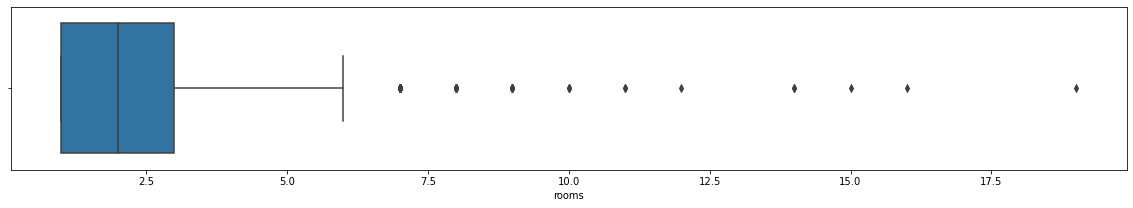

In [53]:
# построим диаграмму размаха по 'rooms'
plt.figure(figsize=(20,3))
sns.boxplot(x=data['rooms'])
plt.show();

In [54]:
len(data[data['rooms'] > 10])

8

размах значений в категории 'rooms' достаточно большой, максимальное количество комнат - 19, для целей нашего исследования, квартиры с количеством комнат более 10, можно убрать или перенести в другой df, т.к. скорее всего на такие квартиры влияют немного другие факторы, чем на обычное жилье

In [55]:
data = data[data['rooms'] < 10]

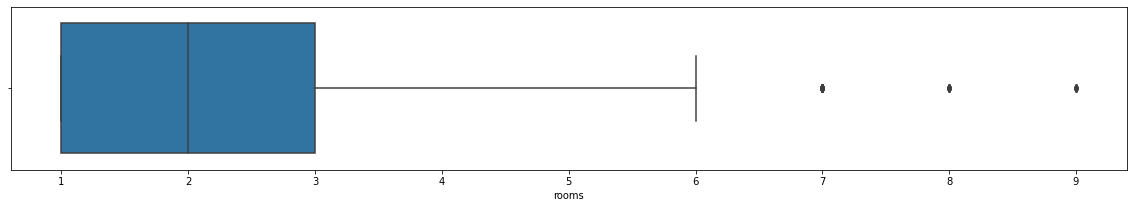

In [56]:
# диаграмму размаха по'rooms' после удаления объектов с количестом комнат более 10
plt.figure(figsize=(20,3))
sns.boxplot(x=data['rooms'])
plt.show();

**'total_area'**

In [57]:
# посмотрим на объекты с небольшой общей площадью, меньше 20 кв.м
data[data['total_area'] < 20].sort_values(by='total_area').head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
19904,4,2400000.0,12.0,2017-07-19,1,2.55,5.0,10.0,2,False,False,False,NaN,0,Санкт-Петербург,21314.0,964.0,1.0,886.0,2.0,45.0,200
19807,0,3800000.0,13.0,2018-07-04,1,2.55,5.0,10.0,3,False,False,False,NaN,0,Санкт-Петербург,21302.0,1242.0,1.0,592.0,3.0,27.0,9
19546,3,1850000.0,13.0,2019-03-11,1,3.40,5.0,NaN,2,False,False,False,NaN,0,Санкт-Петербург,24915.0,5483.0,1.0,644.0,0.0,NaN,24
17961,3,1400000.0,13.0,2017-12-03,1,2.60,9.0,NaN,1,False,False,False,NaN,0,Санкт-Петербург,14350.0,15945.0,0.0,NaN,1.0,185.0,410
19558,2,1686000.0,13.2,2018-12-17,1,2.55,5.0,NaN,1,False,False,False,NaN,0,Санкт-Петербург,19891.0,4165.0,1.0,361.0,1.0,155.0,19


In [58]:
len(data[data['total_area'] < 20])

27

квартир с площадью  меньше 20 кв.м. 27, скорее всего это малосемейное жилье, оставим как есть

**'living_area'**

In [59]:
# уникальные значения столбца 'living_area'
data['living_area'].sort_values().unique() 

array([  2. ,   3. ,   5. , ..., 332. , 347.5,   nan])

In [60]:
# коэффициент коррелциия между общей и жилой площадью
data['total_area'].corr(data['living_area'])

0.9378788379083212

In [61]:
# т.к.коэффициент коррелциия между общей и жилой площадью практически равен 1 и данные по общей площади есть по всем 
# объектам, то можно использовать для нахождения жилой площади коэффициент соотношения между общей и жилой площадью
corr_total_living_area = data['total_area'].median() / data['living_area'].median()
corr_total_living_area

1.7333333333333334

In [62]:
# заполним пропущенные и аномальные, меньше 10 метров,значения столбца 'living_area' с помщью коэффициента 
# соотношения между общей и жилой площадью
data['living_area'] =  data['living_area'].fillna(data['total_area'] / corr_total_living_area)
data.loc[data['living_area'] < 10, 'living_area'] = data['total_area'] / corr_total_living_area

In [63]:
# проверка данных в столбце 'living_area'
data['living_area'].sort_values().unique()

array([  7.5       ,   7.61538462,   8.65384615, ..., 332.        ,
       347.5       , 364.03846154])

**'kitchen_area'**

In [64]:
# уникальные значения столбца 'kitchen_area'
data['kitchen_area'].sort_values().unique() 

array([  1.3 ,   2.  ,   2.3 ,   2.4 ,   2.89,   3.  ,   3.2 ,   3.3 ,
         3.4 ,   3.5 ,   3.7 ,   3.8 ,   4.  ,   4.1 ,   4.2 ,   4.3 ,
         4.4 ,   4.5 ,   4.6 ,   4.7 ,   4.8 ,   4.9 ,   5.  ,   5.04,
         5.06,   5.1 ,   5.14,   5.2 ,   5.21,   5.23,   5.25,   5.28,
         5.29,   5.3 ,   5.31,   5.33,   5.35,   5.4 ,   5.42,   5.44,
         5.47,   5.49,   5.5 ,   5.53,   5.59,   5.6 ,   5.61,   5.62,
         5.64,   5.65,   5.68,   5.7 ,   5.74,   5.75,   5.78,   5.8 ,
         5.82,   5.85,   5.86,   5.9 ,   5.91,   6.  ,   6.02,   6.03,
         6.1 ,   6.16,   6.19,   6.2 ,   6.22,   6.23,   6.24,   6.25,
         6.26,   6.27,   6.28,   6.3 ,   6.31,   6.33,   6.35,   6.36,
         6.37,   6.4 ,   6.47,   6.5 ,   6.55,   6.58,   6.6 ,   6.61,
         6.62,   6.65,   6.7 ,   6.72,   6.73,   6.76,   6.77,   6.8 ,
         6.82,   6.83,   6.84,   6.86,   6.9 ,   6.91,   6.93,   6.95,
         7.  ,   7.02,   7.03,   7.06,   7.09,   7.1 ,   7.12,   7.15,
      

In [65]:
# кофээфициент корреляции между общей площадью и площадью кухни
corr_total_kitchen_area = data['total_area'].median() / data['kitchen_area'].median()
corr_total_kitchen_area

5.714285714285714

In [66]:
# этим же ме методом заполним пропущенные и аномальные, меньше 6 метров, значения столбца 'kitchen_area'
data['kitchen_area'] =  data['kitchen_area'].fillna(data['total_area'] / corr_total_kitchen_area)
data.loc[data['kitchen_area'] < 6, 'kitchen_area'] = data['total_area'] / corr_total_kitchen_area

**'last_price'**

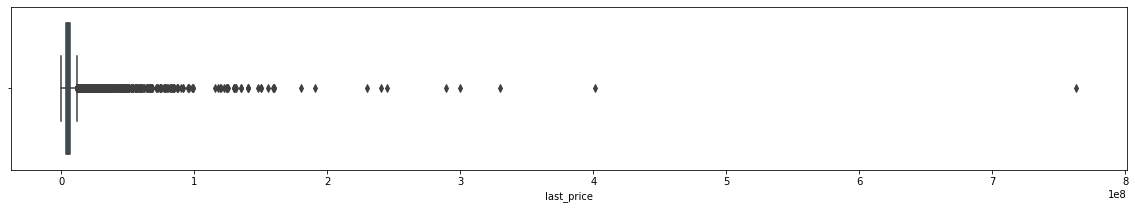

In [67]:
# построим диаграмму размаха по'last_price'
plt.figure(figsize=(20,3))
sns.boxplot(x=data['last_price'])
plt.show();

In [68]:
data['last_price'].describe()

count    2.368800e+04
mean     6.513836e+06
std      1.053756e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.790000e+06
max      7.630000e+08
Name: last_price, dtype: float64

размах значений в 'last_price' очень большой:

    - максимальная цена равна 763 млн.руб.
    - минимальная цена 12 тыс.руб.

для целей исследования квартиры со стоимостью свыше 100 млн.руб., можно убрать или перенести в другой df, т.к. скорее всего на очень дорогие квартиры влияют немного другие факторы, чем на обычное жилье

In [69]:
len(data[data['last_price'] > 100000000])

36

In [70]:
# посмотрим на объекты с ценой менее 500 тыс.руб.
data[data['last_price'] < 500000]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
5698,7,450000.0,42.0,2017-07-31,2,2.80,1.0,23.000000,1,False,False,False,7.3500,0,посёлок городского типа Будогощь,NaN,NaN,NaN,NaN,NaN,NaN,233
6859,6,490000.0,40.0,2017-12-11,1,2.55,5.0,23.076923,3,False,False,False,7.0000,0,деревня Старополье,NaN,NaN,NaN,NaN,NaN,NaN,43
8793,7,12190.0,109.0,2019-03-20,2,2.75,25.0,32.000000,25,False,False,False,40.5000,0,Санкт-Петербург,36421.0,9176.0,1.0,805.0,0.0,NaN,8
9581,7,450000.0,43.4,2018-08-31,2,2.55,5.0,30.300000,3,False,False,False,7.5950,0,деревня Старополье,NaN,NaN,NaN,NaN,NaN,NaN,96
10782,3,490000.0,29.1,2016-05-05,1,2.50,5.0,17.000000,5,False,False,False,5.0925,0,Сланцы,NaN,NaN,NaN,NaN,NaN,NaN,719
14911,5,430000.0,54.0,2018-06-26,2,2.80,3.0,31.153846,3,False,False,False,9.4500,0,посёлок станции Свирь,NaN,NaN,NaN,NaN,NaN,NaN,44
16032,8,480000.0,32.0,2019-01-06,1,2.70,2.0,16.000000,1,False,False,False,5.6000,0,Сланцы,NaN,NaN,NaN,NaN,NaN,NaN,83
16219,14,450000.0,38.5,2018-07-11,2,2.65,2.0,22.211538,1,False,False,False,6.7375,0,деревня Вахнова Кара,NaN,NaN,NaN,NaN,NaN,NaN,45
16274,18,440000.0,40.0,2018-07-10,1,2.55,5.0,23.076923,1,False,False,False,7.0000,0,деревня Старополье,NaN,NaN,NaN,NaN,NaN,NaN,45
17456,7,430000.0,30.4,2019-04-22,1,2.70,2.0,16.000000,1,False,False,False,6.0000,0,Сланцы,NaN,NaN,NaN,NaN,NaN,NaN,95


в основном недорогие объекты с ценой менее 500 тыс.руб. это объекты в деревнях, станциях - это нормально, но есть аномалия - цена 12 тыс.руб. при общей площади 109 кв.м., этот объект удалим, т.к. он явно с ошибочной ценой и будет мешать исследованию

In [74]:
data = data[(data['last_price'] < 100000000) & (data['last_price'] > 200000)]

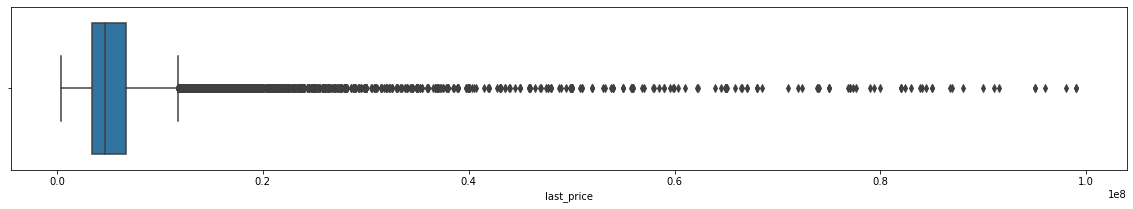

In [75]:
# диаграмму размаха по'last_price' после удаления объектов стоимостью больше 100 млн.руб.
plt.figure(figsize=(20,3))
sns.boxplot(x=data['last_price'])
plt.show();

In [81]:
data['last_price'].describe()

count    2.365100e+04
mean     6.241375e+06
std      6.399957e+06
min      4.300000e+05
25%      3.400000e+06
50%      4.630000e+06
75%      6.750000e+06
max      9.900000e+07
Name: last_price, dtype: float64

**выведем информацию по dataframe после обработки**

**Итоги по п.2.4**
- 'ceiling_height' - исправлены значения c высотой меньше 2,5 метров и более 20 метров на высоту 2.5. по СНИП;
- пропущенные значения 'ceiling_height' заменил:
   - на медианные значения по группам этажности домов, там где это возможно
   - 77 объектов, у которых нет данных о высоте дома, заполнил на медианное значение по всему df
- 'rooms' -  значения комнат=0, это значения для категории 'studio', заменили на значение 1;
- 'living_area' - исправлены значения с площадью меньше 14 кв.м. и NaN на значения коррелируюшие с общей 
   площади с коффициентом; 
- 'kitchen_area' - исправлены значения с площадью меньше 6 кв.м. и NaN на значения коррелируюшие с общей 
   площади с коффициентом;
- 'last_price' - удалены аномальные объекты с ценой 12 тыс. руб. и с ценой больше 100 млн.руб.

In [82]:
data = data.reset_index(drop=True)

In [83]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23651 entries, 0 to 23650
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23651 non-null  int64         
 1   last_price            23651 non-null  float64       
 2   total_area            23651 non-null  float64       
 3   first_day_exposition  23651 non-null  datetime64[ns]
 4   rooms                 23651 non-null  int64         
 5   ceiling_height        23651 non-null  float64       
 6   floors_total          23565 non-null  float64       
 7   living_area           23651 non-null  float64       
 8   floor                 23651 non-null  int64         
 9   is_apartment          23651 non-null  bool          
 10  studio                23651 non-null  bool          
 11  open_plan             23651 non-null  bool          
 12  kitchen_area          23651 non-null  float64       
 13  balcony         

In [84]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total               86
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name               0
airports_nearest         5541
city_centers_nearest     5518
parks_around_3000        5517
parks_nearest           15606
ponds_around_3000        5517
ponds_nearest           14580
days_exposition             0
dtype: int64

**Итоги, информация по п.2 в целом**

были задачи проверить и обработать: 
- пропуски
- типы данных
- название населенных пунктов
- аномальные значения

сделано:

- days_exposition   - пропущеные значения заменили на медианное значение, приведено обоснование;
- is_apartment - пропущеные значения заменили на False;
- floors_total - 86 значений не указаны, заполнить сложно так как сложно подобрать логику, оставим пока так;
- ceiling_height: 
    - исправлены аномальные значения c высотой меньше 2,5 метров и более 20 метров на высоту 2.5. по СНИП;
    - пропущенные значения ceiling_height заменил:
        - на медианные значения по группам этажности домов, там где это возможно
        - 77 объектов, у которых нет данных о высоте дома, заполнил на медианное значение по всему df

- living_area - исправлены значения с площадью меньше 14 кв.м. и NaN на значения коррелируюшие с общей площади с коффициентом;
- kitchen_area - исправлены значения с площадью меньше 6 кв.м. и NaN на значения коррелируюшие с общей площади с коффициентом;
- rooms:
    - значения комнат=0, это значения для категории 'studio', заменили на значение 1;
    - удалили объекты с количеством комнат больше 10, как не совсем подходящее для данного исследования;
- last_price - удалены аномальные объекты с ценой 12 тыс. руб. и с ценой больше 100 млн.руб.,как не совсем подходящее для данного исследования;
- balcony - пропущеные значения заменили на 0;
- locality_name - устранили неявные дубликаты
- locality_name - 49 объектов с неивестным н/п, восстановить сходу трудно, возможно можно использовать данные airports_nearest, city_centers_nearest для определения н/п, пока удалять не будем, обозначили как "неизвестно";

- airports_nearest, city_centers_nearest, parks_around_3000, parks_nearest, ponds_around_3000, ponds_nearest: 
    - пропуски сделаны не Санкт-Петербурге, а в других н/п
    - видимо в этих н/п эта информация не так важна для определения цены и продажи
    - на данном этапе оставим как есть, в дельнейшем при исследовании вернемся к этому вопросу;



# 3 Посчитайте и добавьте в таблицу новые столбцы

    • цена одного квадратного метра;
    • день недели публикации объявления (0 — понедельник, 1 — вторник и так далее);
    • месяц публикации объявления;
    • год публикации объявления;
    • тип этажа квартиры (значения — «‎первый», «последний», «другой»);
    • расстояние до центра города в километрах (переведите из м в км и округлите до целых значений).

In [85]:
# цена одного квадратного метра
data['price_per_square_meter'] = data['last_price'] / data['total_area']

In [86]:
# день недели публикации объявления
data['day_week_publication'] = data['first_day_exposition'].dt.weekday

In [87]:
# месяц публикации объявления
data['month_publication'] = pd.DatetimeIndex(data['first_day_exposition']).month

In [88]:
# год публикации объявления
data['year_publication'] = pd.DatetimeIndex(data['first_day_exposition']).year

In [89]:
data['floors_total'].unique()

array([16., 11.,  5., 14., 12., 26., 24., 27.,  9.,  6., 17., 25.,  3.,
       23., 19., 18.,  4., 22.,  8.,  2., 10.,  7., 13., 15., nan, 20.,
       28., 36., 21., 35., 34., 60.,  1., 29., 33., 52., 37.])

In [90]:
for i in range(1000):
    if data.loc[i, 'floors_total'] == None:
        print(data.loc[i, 'floors_total'])

In [91]:
# тип этажа квартиры (значения — «первый», «последний», «другой»)
for i in range(len(data)):
    if data.loc[i,'floor'] == 1:
        data.loc[i, 'floor_type'] = 'первый'
    elif data.loc[i,'floor'] == data.loc[i, 'floors_total']:
        data.loc[i, 'floor_type'] = 'последний'
    else:
        data.loc[i, 'floor_type'] = 'другой'

In [92]:
# расстояние до центра города в километрах
data['city_centers_nearest'] = round(data['city_centers_nearest'] / 1000)

In [93]:
# расстояние до аэропорта в километрах
data['airports_nearest'] = round(data['airports_nearest'] / 1000)

In [94]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,price_per_square_meter,day_week_publication,month_publication,year_publication,floor_type
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.000000,8,False,False,False,25.000,0,Санкт-Петербург,19.0,16.0,1.0,482.0,2.0,755.0,95,120370.370370,3,3,2019,другой
1,7,3350000.0,40.4,2018-12-04,1,2.75,11.0,18.600000,1,False,False,False,11.000,2,посёлок Шушары,13.0,19.0,0.0,NaN,0.0,NaN,81,82920.792079,1,12,2018,первый
2,10,5196000.0,56.0,2015-08-20,2,2.55,5.0,34.300000,4,False,False,False,8.300,0,Санкт-Петербург,22.0,14.0,1.0,90.0,2.0,574.0,558,92785.714286,3,8,2015,другой
3,0,64900000.0,159.0,2015-07-24,3,2.60,14.0,91.730769,9,False,False,False,27.825,0,Санкт-Петербург,28.0,7.0,2.0,84.0,3.0,234.0,424,408176.100629,4,7,2015,другой
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.000000,13,False,False,False,41.000,0,Санкт-Петербург,32.0,8.0,2.0,112.0,1.0,48.0,121,100000.000000,1,6,2018,другой


**добавлены новые столбцы в df**

In [95]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23651 entries, 0 to 23650
Data columns (total 27 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   total_images            23651 non-null  int64         
 1   last_price              23651 non-null  float64       
 2   total_area              23651 non-null  float64       
 3   first_day_exposition    23651 non-null  datetime64[ns]
 4   rooms                   23651 non-null  int64         
 5   ceiling_height          23651 non-null  float64       
 6   floors_total            23565 non-null  float64       
 7   living_area             23651 non-null  float64       
 8   floor                   23651 non-null  int64         
 9   is_apartment            23651 non-null  bool          
 10  studio                  23651 non-null  bool          
 11  open_plan               23651 non-null  bool          
 12  kitchen_area            23651 non-null  float6

# 4 Проведите исследовательский анализ данных

**4.1.	Изучите следующие параметры объектов:**
- общая площадь;
- жилая площадь;
- площадь кухни;
- цена объекта;
- количество комнат;
- высота потолков;
- этаж квартиры;
- тип этажа квартиры («первый», «последний», «другой»);
- общее количество этажей в доме;
- расстояние до центра города в метрах;
- расстояние до ближайшего аэропорта;
- расстояние до ближайшего парка;
- день и месяц публикации объявления.

Постройте отдельные гистограммы для каждого из этих параметров. Опишите все ваши наблюдения по параметрам в ячейке с типом markdown.

In [96]:
# функция для вывода графиков, данных

def hist_box_show(data, col=str, bins=50, step=1):
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18, 4))
    
    ax[0].hist(data[col], bins=bins, ec='#000000')
    ax[0].set_title(col, fontsize=14)
    ax[0].set_ylabel(ylabel='Частота', fontsize=14)
    ax[0].set_xticks(range(0, int(max(data[col])), step))
    ax[0].grid()
 
    ax[1].boxplot(data[col], vert=False)
    ax[1].set_title(col, fontsize=14 )
    ax[1].set_ylabel(ylabel='Медиана, Квартили, Выбросы', fontsize=14)
    ax[1].set_xticks(range(0, int(max(data[col])),  step)) 
    ax[1].grid()
    
    plt.show()

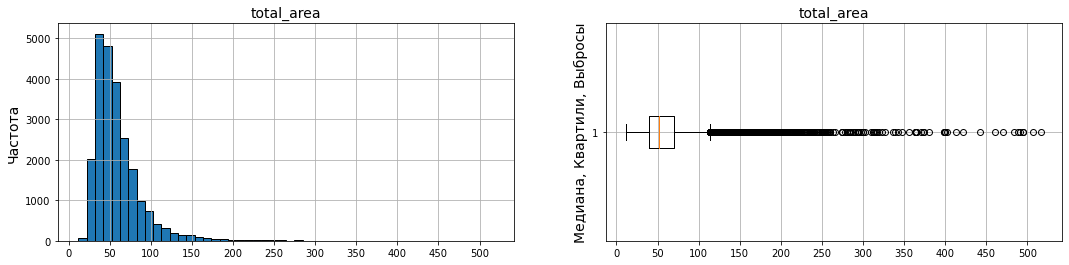

In [97]:
# гистограмма, диаграмма размаха total_area
hist_box_show(data,'total_area', step=50)

In [98]:
# общая площадь 90% перцентиль
data['total_area'].quantile(0.90)

93.0

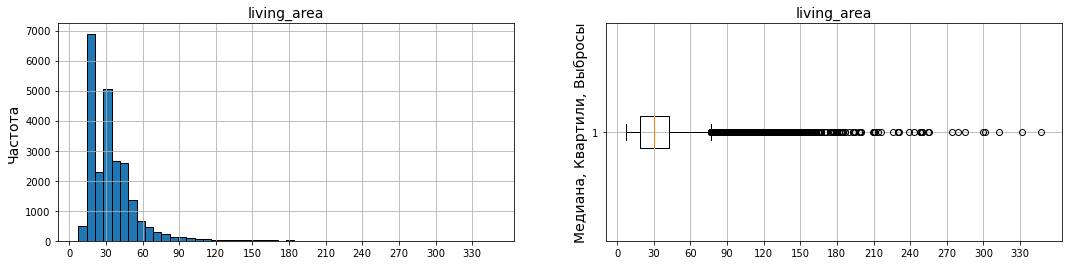

In [99]:
# гистограмма, диаграмма размаха living_area
hist_box_show(data,'living_area', step=30)

In [100]:
# жилая площадь 90% перцентиль
data['living_area'].quantile(0.90)

55.0

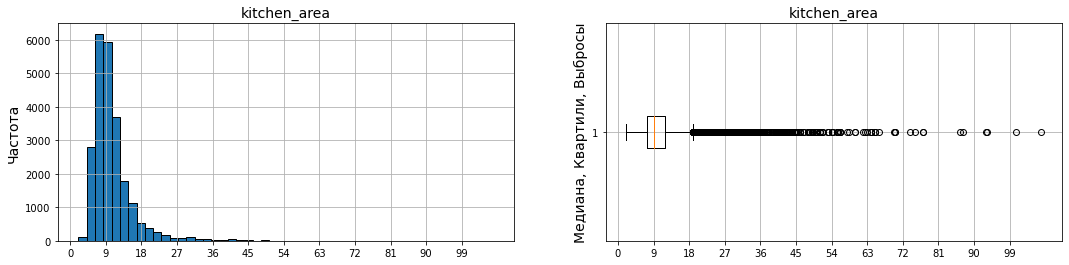

In [101]:
# гистограмма, диаграмма размаха kitchen_area
hist_box_show(data,'kitchen_area', step=9)

In [102]:
# площадь кухни 90% перцентиль
data['kitchen_area'].quantile(0.90)

15.8

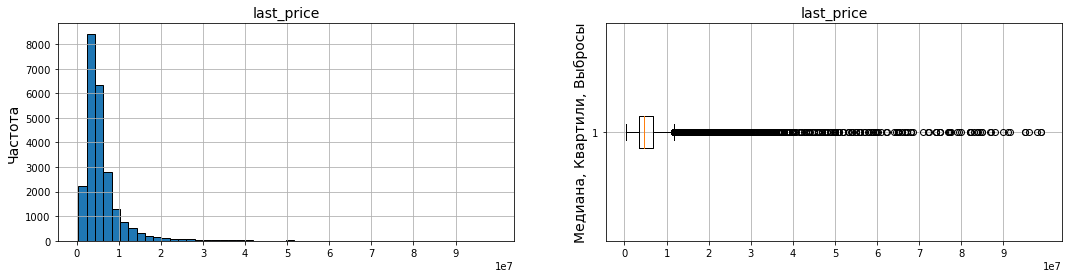

In [103]:
# гистограмма, диаграмма размаха last_price, шаг 10 млн.руб.
hist_box_show(data,'last_price', step=10000000)

In [104]:
data['last_price'].describe()

count    2.365100e+04
mean     6.241375e+06
std      6.399957e+06
min      4.300000e+05
25%      3.400000e+06
50%      4.630000e+06
75%      6.750000e+06
max      9.900000e+07
Name: last_price, dtype: float64

In [105]:
# цена 90% перцентиль
data['last_price'].quantile(0.90)

10850000.0

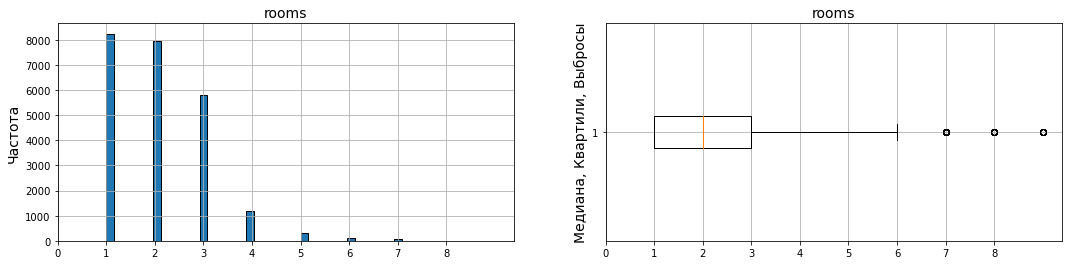

In [106]:
# гистограмма, диаграмма размаха rooms
hist_box_show(data,'rooms', step=1)

In [107]:
data['rooms'].describe()

count    23651.000000
mean         2.069426
std          1.031635
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          9.000000
Name: rooms, dtype: float64

In [108]:
# количество комнат 90% перцентиль
data['rooms'].quantile(0.9)

3.0

In [109]:
# доли количества крартир с определеным количеством комнат
data['rooms'].value_counts('mean')

1    0.348569
2    0.335631
3    0.245656
4    0.049512
5    0.013361
6    0.004228
7    0.002283
8    0.000423
9    0.000338
Name: rooms, dtype: float64

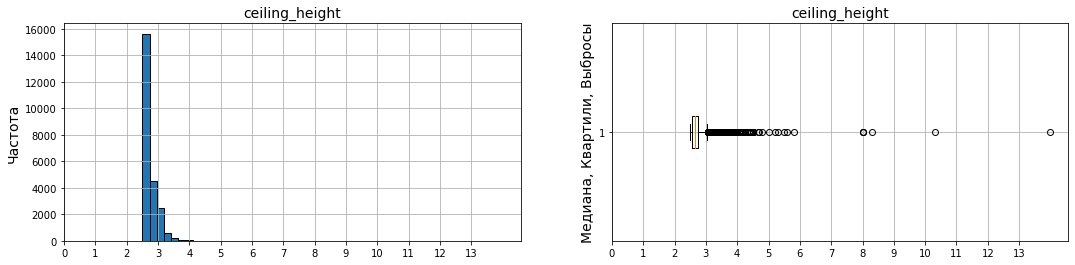

In [110]:
# гистограмма, диаграмма размаха ceiling_height
hist_box_show(data,'ceiling_height', step=1)

In [111]:
data['ceiling_height'].describe()

count    23651.000000
mean         2.708363
std          0.256513
min          2.500000
25%          2.550000
50%          2.650000
75%          2.750000
max         14.000000
Name: ceiling_height, dtype: float64

In [112]:
# высота потолков 90% перцентиль
data['ceiling_height'].quantile(0.9)

3.0

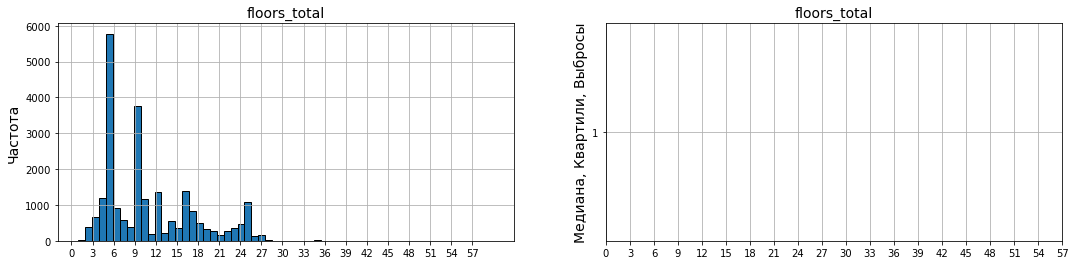

In [113]:
# гистограмма, диаграмма размаха floors_total
hist_box_show(data,'floors_total', bins=60, step=3)

In [114]:
data['floors_total'].describe()

count    23565.000000
mean        10.681434
std          6.599144
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

In [115]:
# количество этажей 90% перцентиль
data['floors_total'].quantile(0.9)

22.0

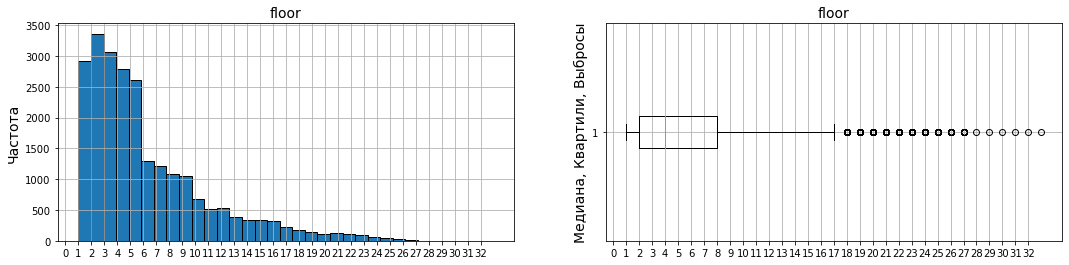

In [116]:
# гистограмма, диаграмма размаха floor
hist_box_show(data,'floor', bins=33, step=1)

In [117]:
data['floor'].describe()

count    23651.000000
mean         5.893070
std          4.885854
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         33.000000
Name: floor, dtype: float64

In [118]:
data['floor'].quantile(0.9)

13.0

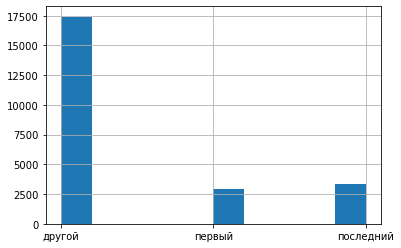

In [119]:
data['floor_type'].hist();

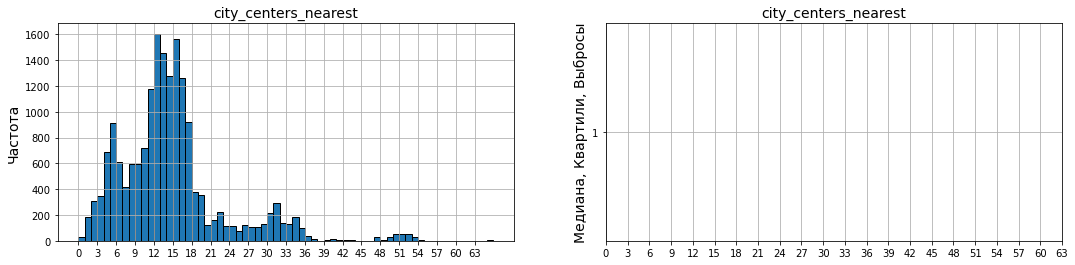

In [120]:
# гистограмма, диаграмма размаха 'city_centers_nearest', расстояние в км.
hist_box_show(data,'city_centers_nearest', bins=66, step=3)

In [121]:
data['city_centers_nearest'].describe()

count    18133.000000
mean        14.210059
std          8.612183
min          0.000000
25%          9.000000
50%         13.000000
75%         16.000000
max         66.000000
Name: city_centers_nearest, dtype: float64

In [122]:
# расстояние до центра 90% перцентиль
data['city_centers_nearest'].quantile(0.9)

26.0

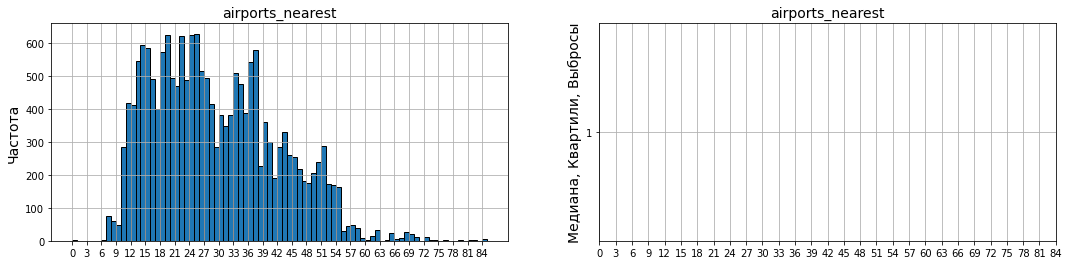

In [123]:
# гистограмма, диаграмма размаха 'airports_nearest', расстояние в км.
hist_box_show(data,'airports_nearest', bins=85, step=3)

In [124]:
data['airports_nearest'].describe()

count    18110.000000
mean        28.806957
std         12.646419
min          0.000000
25%         19.000000
50%         27.000000
75%         37.000000
max         85.000000
Name: airports_nearest, dtype: float64

In [125]:
# расстояние до аэропорта 90% перцентиль
data['airports_nearest'].quantile(0.9)

47.0

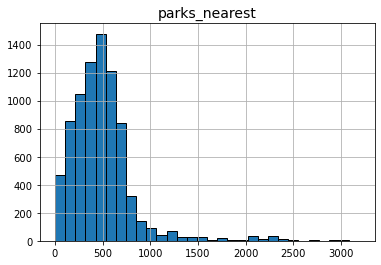

In [126]:
# гистограмма parks_nearest
data['parks_nearest'].hist(bins=30, ec='#000000')
plt.title('parks_nearest', fontsize=14);

In [127]:
# расстояние до парка 90% перцентиль
data['parks_nearest'].quantile(0.9)

763.0

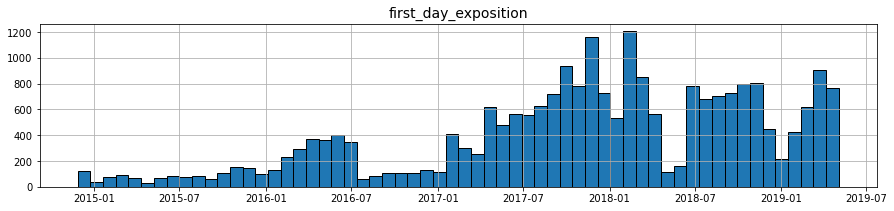

In [128]:
# гистограмма first_day_exposition
data['first_day_exposition'].hist(bins=60, figsize=(15,3), ec='#000000')
plt.title('first_day_exposition', fontsize=14);

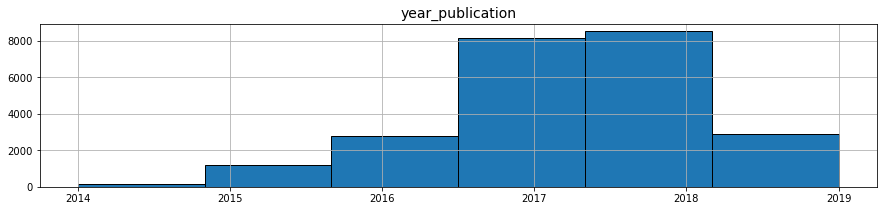

In [129]:
# гистограмма year_publication
data['year_publication'].hist(bins=6, figsize=(15,3), ec='#000000')
plt.title('year_publication', fontsize=14);

In [130]:
data.groupby('year_publication')['last_price'].count()

year_publication
2014     137
2015    1184
2016    2773
2017    8174
2018    8510
2019    2873
Name: last_price, dtype: int64

**4.1. Выводы, усредненные данные за период 2014-2019:**
- total_area (общая площадь) - 90% квартир с площадью до 93 кв.м., медиана - 50 кв.м.
- living_area (жилая площадь) - 90% квартир с площадью до 55 кв.м., медиана - 30 кв.м.
- kitchen_area (площадь кухни) - 90% квартир с площадью кухни до 15.8 кв.м., медиана - 9 кв.м.
- last_price (последняя цена) - 90% квартир от 2 до 10.8 млн.руб, медианная цена - 4,65 млн.руб.
- rooms (количество комнат) - 90% квартир с 1-3 комнатные, медиана - 2 комнаты
- ceiling_height (высота потолков) - 90% с высотой 2.5-3 метра, медина - 2.65
- floors_total (всего этажей) - большинство квартир в домах с этажностью 5 и 9 этажей, также есть 
  пики с этажностью 10,12,16,25 этажей в доме;
- floors (этаж) - более 90% квартир со 2 по 13 этаж, медиана - 4 этажа;
- floor_type (тип этажа) - 80% квартир не на первом и не на последнем этажах;
- city_сenters_nearest (расстояние от центра) - 75% квартир на расстоянии до 16 км от центра, 90% на расстоянии до 26 км, 
  что соответствует "спальным кварталлам", медиана - 13 км, есть пик квартир на расстоянии 5 км от центра, есть хвост до 66км;
- airports_nearest (расстояние до аэропорта) - 75% квартир на расстоянии до 37 км, 90% квартир на расстояние до 47 км, 
  медиана - 27км, есть хвост до 85 км; 
- parks_nearest (расстояние до парка) - 90% квартир на расстоянии до 763 метров до парка;
- year_publication (дата публикации) - 70% объявлений было размещенно в период 2017-2018гг, в 2019 примерно - 10%;

**4.2.	Изучите, как быстро продавались квартиры (столбец days_exposition). Этот параметр показывает, сколько дней было размещено каждое объявление.**
- Постройте гистограмму.
- Посчитайте среднее и медиану.
- В ячейке типа markdown опишите, сколько времени обычно занимает продажа. Какие продажи можно считать быстрыми, а какие — необычно долгими?


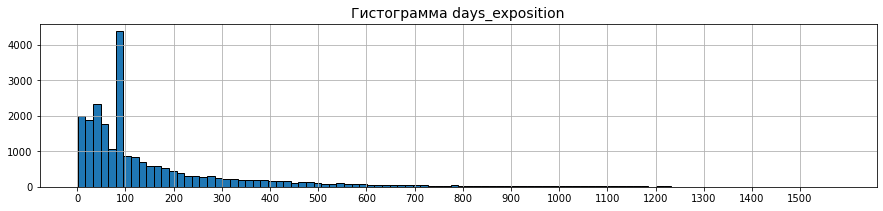

In [177]:
# гистограмма days_exposition
data['days_exposition'].hist(bins=100, figsize=(15,3), ec='#000000')
plt.xticks(range(0, int(max(data['days_exposition'])), 100))
plt.title('Гистограмма days_exposition', fontsize=14);

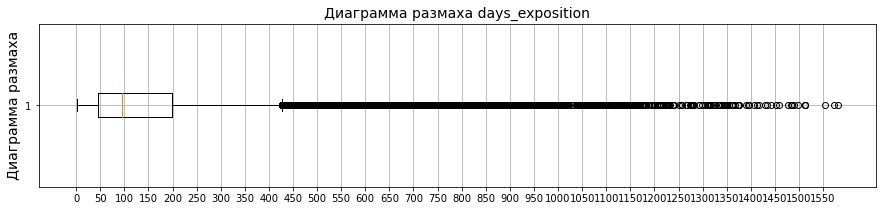

In [178]:
# диаграмма размаха days_exposition
plt.figure(figsize=(15,3))
plt.boxplot(data['days_exposition'], vert=False)
plt.ylabel('Диаграмма размаха', fontsize=14)
plt.xticks(range(0, int(max(data['days_exposition'])), 50))
plt.grid()
plt.title('Диаграмма размаха days_exposition', fontsize=14);

In [179]:
# статистика по признаку days_exposition
data['days_exposition'].describe()

count    23651.000000
mean       169.093780
std        206.208695
min          1.000000
25%         45.000000
50%         95.000000
75%        198.000000
max       1580.000000
Name: days_exposition, dtype: float64

In [180]:
data['days_exposition'].quantile(0.90)

425.0

In [181]:
data['days_exposition'].value_counts().head(10)

95    3237
45     879
60     538
7      234
30     208
90     204
4      176
3      158
5      152
14     147
Name: days_exposition, dtype: int64

**Выводы п.4.2., по столбцу 'days_exposition':**
- mediana = 95, mean = 169 дней
- 75% значений от 0 до 198 дней, 90% всех значений до 425 дней, есть выбросы до 1580 дней
- обычно продажа занимает 95 дня, медианное значение
- к быстрым продажам можно отнести продажи с длительностью в первой четверти, это от 1 до 50 дней
- к необычно долгим продажам можно отнести продажи с длительностью в третьй четверти, более 198 дней

**4.3. Какие факторы больше всего влияют на общую (полную) стоимость объекта?
Изучите, зависит ли цена от:**
- общей площади;
- жилой площади;
- площади кухни;
- количества комнат;
- этажа, на котором расположена квартира (первый, последний, другой);
- даты размещения (день недели, месяц, год).

Постройте графики, которые покажут зависимость цены от указанных выше параметров. Для подготовки данных перед визуализацией вы можете использовать сводные таблицы.


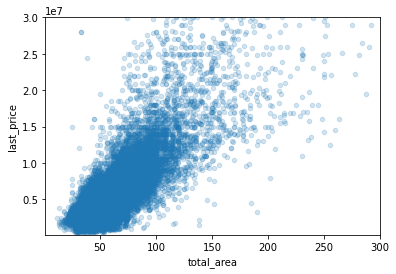

In [136]:
# график корреляции - общая площадь и цена, цена в промежутке 100 тыс.руб.-30 млн.руб.
data.plot(x='total_area', y='last_price', kind='scatter', xlim=(1,300), ylim=(100000,30000000), alpha=0.2);

In [137]:
# коэффициент коррелиции
data['total_area'].corr(data["last_price"])

0.7684931485861493

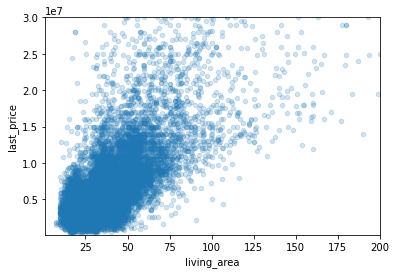

In [138]:
# график корреляции - жилая площадь и цена, цена в промежутке 100 тыс.руб.-30 млн.руб.
data.plot(x='living_area', y='last_price', kind='scatter', xlim=(1,200), ylim=(100000,30000000),alpha=0.2);

In [139]:
# коэффициент коррелиции
data['living_area'].corr(data["last_price"])

0.6910580254692877

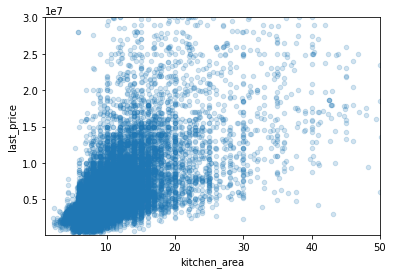

In [140]:
# график корреляции - площадь кухни и цена, цена в промежутке 100 тыс.руб.-30 млн.руб.
data.plot(x='kitchen_area', y='last_price', kind='scatter', xlim=(1,50), ylim=(100000,30000000), alpha=0.2);

In [141]:
# коэффициент коррелиции
data['kitchen_area'].corr(data["last_price"])

0.6123267585571922

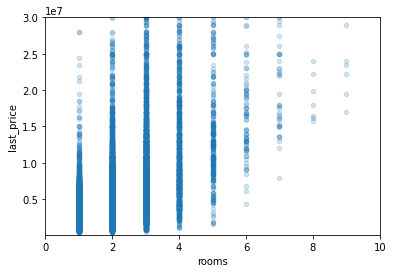

In [142]:
# график корреляции - количество комнат и цена, цена в промежутке 100 тыс.руб.-30 млн.руб.
data.plot(x='rooms', y='last_price', kind='scatter', xlim=(0,10), ylim=(100000,30000000), alpha=0.2);

In [143]:
# коэффициент коррелиции количество комнат и цена
data['rooms'].corr(data["last_price"])

0.4702221104333459

In [144]:
# сводная таблица по параметрам 'floor_type', 'last_price' 
# количество значений в категории 'floor_type' и средняя цена в категории

pt_floor_price = data.pivot_table(index='floor_type', values='last_price', aggfunc=['count','median'])
pt_floor_price.columns = ('floor_type_count', 'floor_type_price_median')
pt_floor_price = pt_floor_price.reset_index()
pt_floor_price

,floor_type,floor_type_count,floor_type_price_median
0,другой,17418,4840000.0
1,первый,2916,3900000.0
2,последний,3317,4300000.0


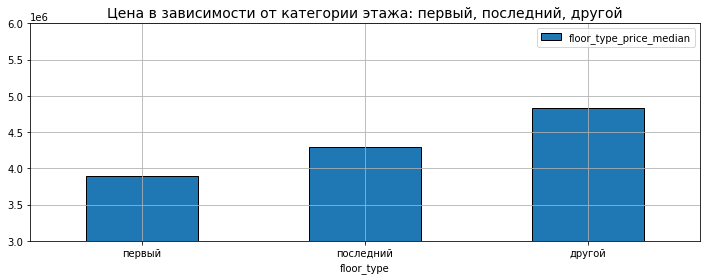

In [145]:
# bar chart по сводной таблице по параметрам 'floor_type', 'floor_type_price_median'
pt_floor_price.sort_values('floor_type_price_median').plot(x=('floor_type'),y=('floor_type_price_median'), 
                                                           kind='bar', figsize=(12,4), rot=0, ec='#000000');
plt.grid()
plt.ylim([3000000,6000000])
plt.title('Цена в зависимости от категории этажа: первый, последний, другой', fontsize=14);

In [146]:
# коэффициент коррелиции между floor_type_count и средней ценой
pt_floor_price['floor_type_count'].corr(pt_floor_price['floor_type_price_median'])

0.9157025134538508

In [147]:
# сводная таблица по параметрам 'day_week_publication', 'last_price'
# количество значений в категории 'day_week_publication' и медианная цена в категории

pt_day_week_publication_price = data.pivot_table(index='day_week_publication', values='last_price',aggfunc=['count','median'])
pt_day_week_publication_price.columns = ('day_week_publication_count', 'day_week_publication_price_median')
pt_day_week_publication_price = pt_day_week_publication_price.reset_index()
pt_day_week_publication_price

,day_week_publication,day_week_publication_count,day_week_publication_price_median
0,0,3605,4650000.0
1,1,4175,4700000.0
2,2,3966,4700000.0
3,3,4286,4630000.0
4,4,3994,4577500.0
5,5,1929,4550000.0
6,6,1696,4550000.0


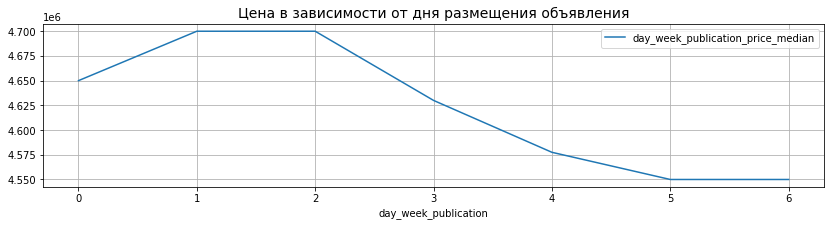

In [148]:
# line chart по сводной таблице по параметрам 'day_week_publication','day_week_publication_price_median'
pt_day_week_publication_price.plot(x='day_week_publication', y='day_week_publication_price_median', figsize=(14,3))
plt.grid()
plt.title('Цена в зависимости от дня размещения объявления', fontsize=14);

In [149]:
# корреляция дня публикации, количества объявлений, медианной цены
pt_day_week_publication_price.corr()

,day_week_publication,day_week_publication_count,day_week_publication_price_median
day_week_publication,1.000000,-0.719492,-0.857359
day_week_publication_count,-0.719492,1.000000,0.749878
day_week_publication_price_median,-0.857359,0.749878,1.000000


In [150]:
# сводная таблица по параметрам 'month_publication', 'last_price'
# количество значений в категории 'month_publication' и медианная цена в категории

pt_month_publication_price = data.pivot_table(index='month_publication', values='last_price',aggfunc=['count','median'])
pt_month_publication_price.columns = ('month_publication_count', 'month_publication_price_median')
pt_month_publication_price = pt_month_publication_price.reset_index()
pt_month_publication_price

,month_publication,month_publication_count,month_publication_price_median
0,1,1496,4600000.0
1,2,2636,4650000.0
2,3,2580,4650000.0
3,4,2371,4800000.0
4,5,1272,4500000.0
5,6,1756,4400000.0
6,7,1689,4650000.0
7,8,1741,4560000.0
8,9,1979,4700000.0
9,10,2123,4550000.0


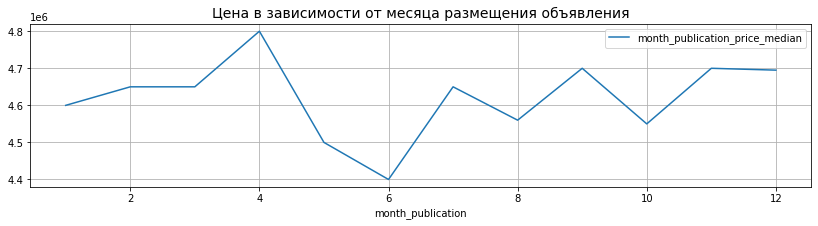

In [151]:
# line chart по сводной таблице по параметрам 'month_publication','month_publication_price_median'
pt_month_publication_price.plot(x='month_publication', y='month_publication_price_median', figsize=(14,3))
plt.grid()
plt.title('Цена в зависимости от месяца размещения объявления', fontsize=14);

In [152]:
# корреляция месяца публикации, количества объявлений, медианной цены
pt_month_publication_price.corr()

,month_publication,month_publication_count,month_publication_price_median
month_publication,1.000000,-0.132342,0.085670
month_publication_count,-0.132342,1.000000,0.486941
month_publication_price_median,0.085670,0.486941,1.000000


In [153]:
# сводная таблица по параметрам 'year_publication', 'last_price'
# количество значений в категории 'year_publication' и медианная цена в категории

pt_year_publication_price = data.pivot_table(index='year_publication', values='last_price', aggfunc=['count', 'median'])
pt_year_publication_price.columns = ('year_publication_count', 'year_publication_price_median')
pt_year_publication_price = pt_year_publication_price.reset_index()
pt_year_publication_price

,year_publication,year_publication_count,year_publication_price_median
0,2014,137,7700000.0
1,2015,1184,5300500.0
2,2016,2773,4500000.0
3,2017,8174,4500000.0
4,2018,8510,4550000.0
5,2019,2873,5050000.0


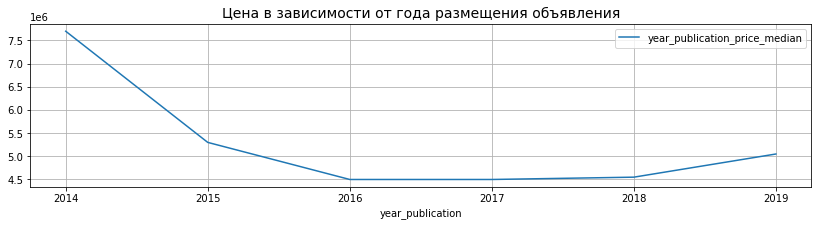

In [154]:
# line chart по сводной таблице по параметрам 'month_publication','month_publication_price_median'
pt_year_publication_price.plot(x='year_publication', y='year_publication_price_median', figsize=(14,3))
plt.grid()
plt.title('Цена в зависимости от года размещения объявления', fontsize=14);

In [155]:
# корреляция года публикации, количества объявлений, медианной цены
pt_year_publication_price.corr()

,year_publication,year_publication_count,year_publication_price_median
year_publication,1.000000,0.616476,-0.669509
year_publication_count,0.616476,1.000000,-0.669209
year_publication_price_median,-0.669509,-0.669209,1.000000


**Выводы п.4.3., зависимость цены от различных параметров**: 
- общая площадь - зависимость есть, коэффициент корреляции 0.77, прямая зависимость при 
  значениях площади 0-150 кв.м, цены 0-15 млн.руб., выше этих значений корреляция размывается, что 
  можно объяснить а) на квартиры большой площади, более 150 кв.м. спрос ниже и соотвественно общая 
  стоимость и цена цена за кв.м уменьшается б) для цена на объекты большой площади могут играть 
  роль другие факторы;
- жилая площадь - зависимость есть, коэффициент корреляции 0.69, что объясняется корреляцией жилой 
  площади с общей;
- площадь кухни - зависимость есть, коэффициент корреляции 0.61, как правило площадь кухни также 
  коррелирует с общей площадью; 
- количества комнат - зависимость небольшая, коэффициент корреляции 0.47, это можно объяснить тем,   
  что общая площадь как правило напрямую не зависит от количества комнат а) размер комнат в квартире м.б. как 
  большим, так и маленьким, б) много домов где жильцы сами формируют(переделывают) количество комнат;
- категория этажа на котором расположена квартира - первый, последний, другой - зависимость есть:
    - средняя цена 
      на этажах первый и последний ниже, чем на других этажах, примерно на 10% на первом этаже ниже чем 
      на последнем, а на последнем на 10% ниже, чем на других;
    - коэффициент корреляции между количеством предложений и категории этажности очень высокий 0.92, 
      подавляющие большинстово покупателей предпочитают не первый и не последний этаж, также повышении 
      этажности домов увеличивает предложение имеено средних этажей, первые этажи переходят в к
      коммерческую недвижимость;
- день недели размещения и цена:
    - зависимость есть, коэффициент корреляции -0.86, высталенные в понедельник,вторник,среду,четверг квартиры дороже
    - также можно отметить, что в рабочии дни количество публикаций больше, примерно в 3 раза из расчета в день;
- месяц размещения - коффициент корреляции не высокий 0.085, но по графику видно:
    - что цена больше при размещениее в марте- апреле и в конце года в ноябрь-декабрь; 
    - летом средняя цена уменьшается, т.к. предложений меньше;
- год размещения:
    - коэффициент корреляции - 0.67
    - в течении анализируемого периода 2014-2019гг было стойкое снижение средней цены на рынке, с 7,7 млн.руб. в 2014 до 4,55 млн.руб. в 2018, 
    - в 2019 небольшой рост средней цены до 5,05 млн.руб.,
    - это м.б. связано:
        - возможно здесь не все данные по предложениям на рынке 
        - резко выросло число продаваемых квартир с 137 до примерно 8000 в среднем в 2017-18гг, и возможно ввод боле дешевого массового жилья, и соотвественно могла снизиться цена за 1 кв.м. 
    - для более точной оценки динамики стоимости жилья по годам, нужно смотреть динамику цены среднего квадратного метра

**дополнительно - исследования динамики цены за 1 кв.м. по годам**

In [156]:
# сводная таблица -  год / средняя стоимость квартир за 1 кв.метр
pt_year_publication_price_per_square_meter = round(data.pivot_table(index='year_publication',\
                                                    values='price_per_square_meter', aggfunc= 'median'))
pt_year_publication_price_per_square_meter = pt_year_publication_price_per_square_meter.reset_index()
pt_year_publication_price_per_square_meter

,year_publication,price_per_square_meter
0,2014,107000.0
1,2015,93333.0
2,2016,91603.0
3,2017,92500.0
4,2018,95670.0
5,2019,103261.0


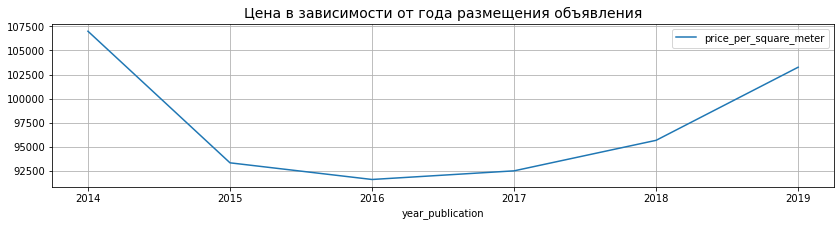

In [157]:
# line chart по сводной таблице по параметрам 'month_publication','month_publication_price_median'
pt_year_publication_price_per_square_meter.plot(x='year_publication', y='price_per_square_meter', figsize=(14,3))
plt.grid()
plt.title('Цена в зависимости от года размещения объявления', fontsize=14);

In [158]:
# количество предложений квартир и объему общей площади по годам
data_year_publication_count_sum = data.groupby('year_publication')['total_area'].agg(['count', 'sum']).reset_index()
data_year_publication_count_sum.columns = ('год публикации', 'количество квартир', 'объем общей площади')
data_year_publication_count_sum

,год публикации,количество квартир,объем общей площади
0,2014,137,11816.23
1,2015,1184,83341.92
2,2016,2773,169848.55
3,2017,8174,492109.85
4,2018,8510,488899.15
5,2019,2873,168893.28


**Вывод** 

- из таблицы и графика можно видеть, что медианная цена за 1 кв.м. была высокой в 2014 на уровне 107 ты.руб., снизилась в 2016-17-18гг до уровня 92-95 тыс.руб., и в 2019 выросла и практически достигла уровня 2014г- 103 тыс.руб. за 1 кв.м.
- вполне возможно это связанно с тем что в 2016-17-18гг. на рынок поступило много предложений по недорогим квартирам, это видно из данных по количеству предложения квартир и по объему общей площади по годам

**4.4.	Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра. Эти данные можно найти по имени в столбце locality_name.**

In [159]:
# группировка по н/п
data_ten_city_price_per_square_meter = round(data.groupby('locality_name')['price_per_square_meter'].\
                                              agg(['count','mean']).sort_values(by='count', ascending=False).head(10))

data_ten_city_price_per_square_meter.reset_index()

,locality_name,count,mean
0,Санкт-Петербург,15673,113610.0
1,посёлок Мурино,556,85682.0
2,посёлок Шушары,440,78677.0
3,Всеволожск,398,68654.0
4,Пушкин,369,103126.0
5,Колпино,338,75425.0
6,посёлок Парголово,327,90176.0
7,Гатчина,307,68746.0
8,деревня Кудрово,299,92474.0
9,Выборг,237,58142.0


In [160]:
# количество предлагаемых квартир в top-10 кроме Санкт-Петерурга
data_ten_city_price_per_square_meter[1:]['count'].sum()

3271

In [161]:
# процент от обшего числа квартир, доли квартир а) предлагаемых в Санкт-Петербурге б) в top-10 кроме Санкт-Петерурга
print(round(data_ten_city_price_per_square_meter[:1]['count'].sum()/len(data),2))
print(round(data_ten_city_price_per_square_meter[1:]['count'].sum()/len(data),2))

0.66
0.14


**Выводы по п.4.4**

в выборке десяти городов с наибольшим количеством объявлений:
- самая высокая цена за кв.м в Санкт-Петербурге = 114 849 руб.
- самая низкая цена за кв.м в Выборге = 58 142 руб.

**4.5.	Ранее вы посчитали расстояние до центра в километрах. Теперь выделите квартиры в Санкт-Петербурге с помощью столбца locality_name и вычислите среднюю цену каждого километра. Опишите, как стоимость объектов зависит от расстояния до центра города.**

In [162]:
# создание df с квартирами только в Санкт-Петербурге
data_Saint_Petersburg = data[data['locality_name'] == 'Санкт-Петербург']

In [163]:
# данные средней стоимоссти квратир по мере удаленности от центра в км.
data_Saint_Petersburg.pivot_table(index='city_centers_nearest', values='last_price', aggfunc='median').reset_index()

,city_centers_nearest,last_price
0,0.0,15900000.0
1,1.0,11150000.0
2,2.0,9950000.0
3,3.0,8400000.0
4,4.0,9150000.0
5,5.0,9400000.0
6,6.0,8850000.0
7,7.0,7800000.0
8,8.0,7440000.0
9,9.0,5300500.0


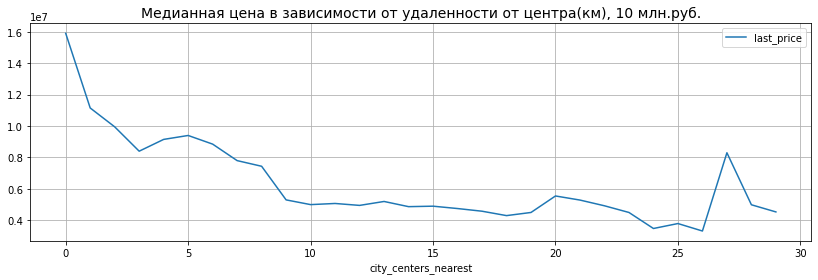

In [164]:
# график показывающий значения средней стоимости квартир по мере удаленности от центра в км.
data_Saint_Petersburg.pivot_table(index='city_centers_nearest', values='last_price', aggfunc='median').plot(figsize=(14,4))
plt.grid()
plt.title('Медианная цена в зависимости от удаленности от центра(км), 10 млн.руб.', fontsize=14);

In [165]:
# коэффициент корреляции средней стоимости квартир и расстояния от центра
data_Saint_Petersburg['city_centers_nearest'].corr(data_Saint_Petersburg["last_price"])

-0.37071137071594257

In [166]:
# данные средней стоимости 1 кв.м жилья по мере удаленности от центра в км.
round(data_Saint_Petersburg.pivot_table(index='city_centers_nearest', values='price_per_square_meter', 
                                                                                aggfunc='median')).reset_index()

,city_centers_nearest,price_per_square_meter
0,0.0,164075.0
1,1.0,127101.0
2,2.0,121592.0
3,3.0,108537.0
4,4.0,117692.0
5,5.0,126925.0
6,6.0,130000.0
7,7.0,126389.0
8,8.0,122945.0
9,9.0,105817.0


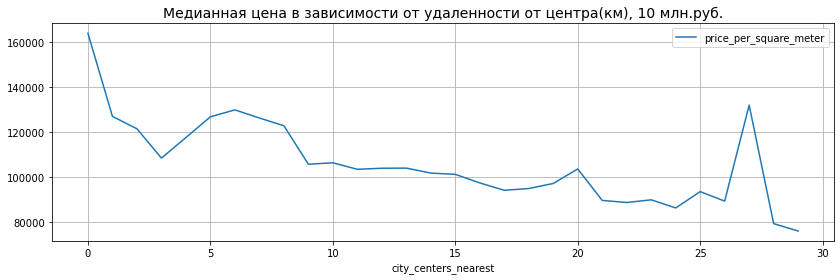

In [167]:
# график показыающий значения средней стоимости 1 кв.м жилья по мере удаленности от центра в км.

round(data_Saint_Petersburg.pivot_table(index='city_centers_nearest', values='price_per_square_meter', 
                                                                            aggfunc='median')).plot(figsize=(14,4))
plt.grid()
plt.title('Медианная цена в зависимости от удаленности от центра(км), 10 млн.руб.', fontsize=14);

In [168]:
# коэффициент корреляции средней стоимости 1 кв.м жилья и расстояния от центра
data_Saint_Petersburg['city_centers_nearest'].corr(data_Saint_Petersburg["price_per_square_meter"])

-0.3464990480154431

**Выводы по п.4.5.**
- данные показывают устойчивую зависимость и цены на квартиры и средней стоимости 1 кв.м жилья от расстояния от центра, чем дальше расстояние от центра, тем дешевле стоимость 1 кв.м жилья;
- в центре стоимость 1 кв.м.  172 619 - 123 036 руб., на расстоянии 28-29 км от центра стоимость 
  79 372 - 76 085 руб. за 1 кв.м.;
- есть отклонения, в частности на расстоянии 27км стоимость 132 116 руб. за 1 кв.м, возможно это 
  связано с наличем новостроек или района элитного жилья;

**4.6. Исследуем зависомость цены от нахождения рядом Парков, Прудов, других факторов**

In [169]:
# корреляция цены и расстояния до парка
data['parks_nearest'].corr(data['last_price'])

-0.016520638741362618

In [170]:
# корреляция цены и расстояния до пруда
data['ponds_nearest'].corr(data['last_price'])

-0.11751891963015713

In [171]:
# зависимость цены и количества прков вокруг
data.pivot_table(index='parks_around_3000', values='last_price', aggfunc='median')

,last_price
parks_around_3000,
0.0,4900000.0
1.0,5650000.0
2.0,6200000.0
3.0,7700000.0


In [172]:
# корреляция цены и количества парков вокруг
data['parks_around_3000'].corr(data['last_price'])

0.21104819845501271

In [173]:
# зависимость цены и количества прудов вокруг
data.pivot_table(index='ponds_around_3000', values='last_price', aggfunc='median')

,last_price
ponds_around_3000,
0.0,4990000.0
1.0,5220000.0
2.0,5950000.0
3.0,8000000.0


In [174]:
# корреляция цены и количества прудов вокруг
data['ponds_around_3000'].corr(data['last_price'])

0.20194596882080112

In [175]:
# корреляция цены и все признаки в df
round(data.corr().loc['last_price'].sort_values(ascending=False),2)

last_price                1.00
total_area                0.77
price_per_square_meter    0.71
living_area               0.69
kitchen_area              0.61
rooms                     0.47
ceiling_height            0.36
parks_around_3000         0.21
ponds_around_3000         0.20
total_images              0.13
days_exposition           0.09
is_apartment              0.05
floor                     0.04
balcony                   0.01
month_publication         0.01
floors_total              0.01
day_week_publication     -0.00
open_plan                -0.01
parks_nearest            -0.02
airports_nearest         -0.04
studio                   -0.04
year_publication         -0.05
ponds_nearest            -0.12
city_centers_nearest     -0.30
Name: last_price, dtype: float64

## Общий вывод

1. Цена квартиры в наибольшей степени зависит от следующих факторов: 
    - от населенного пункта: в Санкт-Петербурге и в н/п рядом, квартиры и цена за 1 кв.м. дороже
    - общей площади квартиры
    - цены за 1 кв.м. - качество: квартиры, дома, района
    - расстояния от центра
    - этаж на котором расположена квартира: на первых и последних этажах цена дешевле,чем на других
    - наличие парков и прудов вокруг
    
   также цена коррелируется с жилой площадь, площадью кухни, количеством комнат, высотой потолков, т.е. факторами которые          влияют на качество жилья и они учтены в цене за 1 кв.м
     
 
2. Наибольшим спросом пользуются квартиры:
    - в Санкт-Петербурге - 60% всех объектов ;
    - посёлок Мурино, посёлок Шушары, Всеволожск, Пушкин, Колпино, посёлок Парголово, Гатчина, деревня Кудрово, Выборг - 14% всех объектов по df;


3. В Санкт-Петербург устойчивая зависимость ср. цены 1 кв.м жилья и расстояния от центра, чем дальше расстояние от центра,    тем дешевле стоимость 1 кв.м жилья:
    - в центре, 0-2 км, стоимость 1 кв.м. 172 619 - 123 036 руб.;
    - на расстоянии 28-29 км от центра стоимость 79 372 - 76 085 руб. за 1 кв.м.;
    - но есть отклонения, в частности на расстоянии:
        - 20 км 103 тыс.руб. за 1 кв.м,
        - 27 км 132 тыс.руб. за 1 кв.м, 
   возможно это связано с наличем новостроек или района элитного жилья;


4. Предлагаемое количество комнат:
     - 90% квартир 1-3 комнатные
     - 35% - 1 комнатные, включая студии
     - 33% - 2 комнатные
     - 25% - 3 комнатные
     - 5% - четырех комнатные
     

5. Высота потолков:
     - 90% квартир с высотой 2.5-3 метра
     - медина - 2.65

    
6. Динамика по годам предложение квартир менялось:


      | год_публикации   |количество_квартир	   |объем_общей_площади |
                2014	       137	                      11 816.23
                2015	      1184	                      83 341.92
                2016	      2773	                     169 848.55
                2017	      8174	                     492 109.85
                2018	      8510	                     488 899.15
                2019	      2874	                     169 002.28


7. Медианная цена за 1 кв.м. : 
    - была высокой в 2014 на уровне 107 тыc.руб.;
    - в 2016-2018гг произошло снижение цены до уровня 92-95 тыс.руб.;
    - в 2019 цена снова выросла и практически достигла уровня 2014г - 103 тыс.руб. за 1 кв.м.

  
8. Сезонность продаж:
    - в течение года: больше квартир выставляется март-апрель, ноябрь-декабрь, летом спад продаж
    - в течении недели: боле актинвые продажи понедельник-четверг, суббота-воскресенье спад продаж
  
     
9. Время (длительность) продажи:
    - 25% всех квартир продаются от 0 до 45 дней 
    - 50% всех продаются до 96 дней;
    - 75% всех продаются до 198 дней;
    - 90% всех продаются до 425 дней;
    - медианная длительность продажи 96 дней;
    - есть выбросы до 1580 дней;


Данная информация может пригодиться:

    - покупателям квартир
    - владельцам квартир, кто планирует продать квартиру
    - специалистам и компаниям по продаже недвижимости


    примечание - цифры и выводы только по данному dataframe